# <center> <b> Analisis Marketing Bank untuk Memprediksi klient yang akan Subscribe Deposit Berjangka menggunakan Neural Network<br>
    


Nama: DESTI RATNA KOMALA

Batch : FTDS-020-RMT

Dataset : `Bank Customer Data in VietNam`

HuggingFace: [`Bank-Marketing-Term-Deposit-prediction`](https://huggingface.co/spaces/destiratnakomala/Bank-Marketing-Term-Deposit)

## 1 - Introduction

### Objective




Sebuah bank di VietNam ingin memaksimalkan biaya pemasaran untuk produk deposito berjangka. Namun, pihak bank kesulitan dalam menentukan klien mana yang akan berlangganan pada produk tersebut. Oleh karena itu, dibutuhkan pemodelan untuk mengindentifikasi hal tersebut berdasarkan perilaku dan informasi data diri masing-masing pelanggan agar upaya pemasaran dapat lebih terarah dan efisien.

### *Dataset* Information

Dataset ini merupakan pemasaran yang dilakukan secara langsung via telepon (phone calls) oleh Bank VietNam, terdiri dari 42639 baris dan 16 kolom. Fitur target (term_deposit) menunjukkan apakah seorang klien akan berlangganan pada produk deposito berjangka atau tidak. Fitur target tersebut bernilai **0 : tidak berlangganan (not_subscribe)** dan **1 : berlangganan (subscribe)**.

Berikut adalah deskripsi dari masing-masing fitur pada dataset `Bank Customer in VietNam`

|Feature|Deskripsi|
|------|-------|
|ID|Nomor id client bank|
|age|Usia client bank|
|job|Jenis pekerjaan client bank|
|marital|status pernikahan client bank|
|education|tingkat pendidikan client bank||
|default|status apakah client bank pernah gagal bayar (default) kartu kredit?||
|housing|status apakah client bank mempunyai cicilan rumah?||
|loan|status apakah client bank mempunyai hutang pribadi?||
|balance|Jumlah saldo yang dimiliki client bank||
|month|Bulan terakhir client bank dihubungi|
|day|hari terakhir client bank dihubungi|
|duration|durasi kontak terakhir bank terhadap client|
|campaign| jumlah kontak yang telah dilakukan selama melakukan kampanye marketing|
|pdays|jumlah hari kontak terakhir setelah client dihubungi oleh tim marketing bank
|previous|jumlah kontak yang dilakukan sebelum tim marketing bank menghubungi client ini
|term_deposit|Status apakah client akan berlangganan tabungan berjangka (term_deposit) atau tidak?



Sehingga, dapat dikategorikan manjadi:

- **Data Klien Bank**

         'ID', 'age', 'marital', 'education', 'job', 'default', 'housing', 'loan', 'balance'


- **Kontak terakhir klien terhadap tim pemasaran**

       'day','month','duration','pdays', 'previous', 'campaign'



- **Status Deposito Berjangka**
        'term_deposit'




## 2 - Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis ini.Libraries ini dimaksudkan untuk mengimport data, cleaning data, analisis, data, visualisasi data, dan pembuatan model hingga pengujian model.

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install protobuf==3.19.4

In [ ]:
!pip show protobuf

Name: protobuf
Version: 3.19.4
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: 3-Clause BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: google-api-core, google-cloud-bigquery, google-cloud-bigquery-connection, google-cloud-bigquery-storage, google-cloud-datastore, google-cloud-firestore, google-cloud-functions, google-cloud-language, google-cloud-translate, googleapis-common-protos, grpc-google-iam-v1, grpcio-status, orbax-checkpoint, proto-plus, tensorboard, tensorflow, tensorflow-datasets, tensorflow-gpu, tensorflow-hub, tensorflow-metadata


In [ ]:
!pip install tensorflow-gpu==2.3

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.3 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.3


In [ ]:
pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [ ]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"

In [ ]:
!pip install feature_engine
!pip install xgboost
!pip install catboost
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#undersampling
from sklearn.utils import resample

# model_selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library handling outlier
from feature_engine.outliers import Winsorizer

# Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library feature scaling dan feature encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler, LabelEncoder

#import Algoritma pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#import SVC dan SVR
from sklearn.svm import SVC, SVR

# Library pemodelan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization, Dropout, Activation


# Library Evaluasi Model
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, f1_score

# Library Saving Model
import pickle
import joblib

#tampilkan seluruh kolom pada data
pd.set_option('display.max_columns', None)

## 3 - Data Loading

Dataset yang digunakan berasal dari `Kaggle: Bank Customer Data in VietNam` dengan file [`customer deposit`](https://www.kaggle.com/datasets/tomculihiddleston/bank-customer-data-in-vietnam).
Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada [BankCustomerData.csv](https://raw.githubusercontent.com/destiratnakomala/Final-Project-FTDS-020/main/Bank-Marketing-Term-Deposit/BankCustomerData.csv). Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [ ]:
#copy dataset
df2=pd.read_csv('https://raw.githubusercontent.com/destiratnakomala/Final-Project-FTDS-020/main/Bank-Marketing-Term-Deposit/BankCustomerData.csv')

In [ ]:
#copy data awal
df=df2.copy()

Data loading akan dibagi menjadi 2, pre-undersampling dan post-undersampling. Hal ini dikarenakan data target pada dataset memiliki nilai yang imbalanced, sehingga dilakukan handle balancing data agar [peformasi](https://towardsdatascience.com/why-we-need-to-deal-with-imbalanced-classes-ec0dc1a7b803) hasil prediksi pemodelan dapat lebih akurat dan tidak didominasi oleh data mayoritas.

### 3-1 Pre- Undersampling

In [ ]:
#tampilkan 10 data awal
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0
5,6,35,management,2,tertiary,0,231,1,0,5,may,139,1,-1,0,0
6,7,28,management,1,tertiary,0,447,1,1,5,may,217,1,-1,0,0
7,8,42,entrepreneur,0,tertiary,1,2,1,0,5,may,380,1,-1,0,0
8,9,58,retired,2,primary,0,121,1,0,5,may,50,1,-1,0,0
9,10,43,technician,1,secondary,0,593,1,0,5,may,55,1,-1,0,0


In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
42629,42630,47,admin.,1,secondary,0,3696,0,0,12,jan,758,4,-1,0,1
42630,42631,30,technician,2,tertiary,0,2166,0,0,12,jan,316,2,-1,0,1
42631,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
42632,42633,29,blue-collar,1,secondary,0,180,0,0,12,jan,350,2,-1,0,0
42633,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
42634,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
42635,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1
42636,42637,34,blue-collar,2,primary,0,6718,0,0,13,jan,278,4,97,1,0
42637,42638,22,student,1,secondary,0,254,0,0,13,jan,143,2,-1,0,1
42638,42639,32,management,1,tertiary,0,1962,0,0,13,jan,130,1,-1,0,0


In [ ]:
#cek ukuran data
df.shape

(42639, 16)

In [ ]:
#cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            42639 non-null  int64 
 1   age           42639 non-null  int64 
 2   job           42639 non-null  object
 3   marital       42639 non-null  int64 
 4   education     42639 non-null  object
 5   default       42639 non-null  int64 
 6   balance       42639 non-null  int64 
 7   housing       42639 non-null  int64 
 8   loan          42639 non-null  int64 
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  term_deposit  42639 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 5.2+ MB


In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

ID              42639
age                75
job                12
marital             3
education           4
default             2
balance          7078
housing             2
loan                2
day                31
month              12
duration         1561
campaign           48
pdays             418
previous           38
term_deposit        2
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
#tampilkan default unique
df['term_deposit'].unique()

array([0, 1])

In [ ]:
#tampilkan jumlah masing-masing nilai pada term_deposit
df['term_deposit'].value_counts()

0    38678
1     3961
Name: term_deposit, dtype: int64

In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

0

---


***Notes Hasil Data Loading Pre-Undersampling:***
- Data ini memiliki 42639 baris dan 16 kolom
- Terdapat 8 kolom objek/kategorikal, 8 kolom numerik
- Data tidak memiliki data missing.
- Pada target (term_deposit), data imbalanced sangat eksrim yaitu pada not-subscribe (0) sebanyak 38678 baris dan subscribe(1) sebanyak 3961. Sehingga perlu dilakukan undersampling pada not-subscribe.


---



### 3-2 Undersampling

Dataset yang digunakan memiliki data besar yaitu sebanyak ~43000 baris. Ratio pada `term_deposit` antara **not subscribe** dan **subscribe** adalah sebesar 166:17 atau sekitar 10:1.

Jika dilakukan oversampling, 90% dari data **subscribe** akan termanipulasi atau sudah tidak asli lagi. Karena oversampling membuat data sintetis yang mengikuti pola dari dataset tersebut.

Sehingga, perlu dilakukan Undersampling agar keaslian data tetap terjaga. Karena undersampling bekerja dengan mengurangi jumlah data mayoritas (**not_subscribe**) yang dipilih secara acak (random) sesuai dengan jumlah baris pada data minoritas (**subscribe**).

In [ ]:
#pisahkan data minoritas dan mayoritas

not_subscribe = df[df.term_deposit==0]
subscribe = df[df.term_deposit==1]

# undersample data mayoritas
not_subscribe_unsampled = resample(not_subscribe,
                          replace=True, # sample with replacement
                          n_samples=len(subscribe), #samakan dengan jumlah minoritas
                          random_state=27)

#gabungkan undersample data dengan subscribe
df_unsampled = pd.concat([not_subscribe_unsampled, subscribe])

#cek jumlah data pada subscribe dan non-subscribe
df_unsampled.term_deposit.value_counts()

0    3961
1    3961
Name: term_deposit, dtype: int64

In [ ]:
#reset index data
dfs=df_unsampled.reset_index(drop=True)

In [ ]:
#simpan data post undersampling
dfs.to_csv('bank_marketing.csv',index_label=False)

In [ ]:
#panggil data post undersampling
dfs=pd.read_csv(r'/content/bank_marketing.csv')
df=dfs.copy()
df

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,5305,30,management,1,tertiary,0,1243,1,0,23,may,135,1,-1,0,0
1,39400,28,student,1,secondary,0,5916,0,0,22,may,259,1,63,5,0
2,15545,29,management,1,secondary,0,0,0,1,21,jul,463,2,-1,0,0
3,5000,32,technician,1,unknown,0,317,1,0,21,may,394,2,-1,0,0
4,31865,54,admin.,2,primary,0,546,1,0,9,apr,40,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
7918,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
7919,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
7920,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1


In [ ]:
#tampilkan 10 data awal
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,5305,30,management,1,tertiary,0,1243,1,0,23,may,135,1,-1,0,0
1,39400,28,student,1,secondary,0,5916,0,0,22,may,259,1,63,5,0
2,15545,29,management,1,secondary,0,0,0,1,21,jul,463,2,-1,0,0
3,5000,32,technician,1,unknown,0,317,1,0,21,may,394,2,-1,0,0
4,31865,54,admin.,2,primary,0,546,1,0,9,apr,40,1,-1,0,0
5,24805,34,blue-collar,2,secondary,0,559,1,0,18,nov,47,1,193,1,0
6,16623,50,blue-collar,2,primary,0,27,1,0,24,jul,142,1,-1,0,0
7,39840,36,admin.,1,secondary,0,119,0,0,2,jun,93,2,-1,0,0
8,26529,32,blue-collar,2,secondary,0,10142,1,0,20,nov,249,1,-1,0,0
9,28744,38,management,0,tertiary,0,441,1,0,30,jan,67,1,-1,0,0


In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
7912,42627,25,technician,1,secondary,0,4859,0,0,12,jan,227,1,-1,0,1
7913,42628,28,services,1,secondary,0,168,0,0,12,jan,387,1,194,1,1
7914,42629,25,blue-collar,1,secondary,0,2007,0,0,12,jan,265,2,-1,0,1
7915,42630,47,admin.,1,secondary,0,3696,0,0,12,jan,758,4,-1,0,1
7916,42631,30,technician,2,tertiary,0,2166,0,0,12,jan,316,2,-1,0,1
7917,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
7918,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
7919,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
7920,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1
7921,42638,22,student,1,secondary,0,254,0,0,13,jan,143,2,-1,0,1


In [ ]:
#cek ukuran data
df.shape

(7922, 16)

In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

ID              7722
age               73
job               12
marital            3
education          4
default            2
balance         3190
housing            2
loan               2
day               31
month             12
duration        1389
campaign          33
pdays            346
previous          29
term_deposit       2
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
#tampilkan default unique
df['term_deposit'].unique()

array([0, 1])

In [ ]:
#tampilkan jumlah masing-masing nilai pada term_deposit
df['term_deposit'].value_counts()

0    3961
1    3961
Name: term_deposit, dtype: int64

In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

200



---


***Notes Hasil Data Loading:***
- Data setelah sampling memiliki 7922 baris dan 16 kolom. Jumlah baris menurun hingga 81.42%.
- Terdapat 8 kolom objek/kategorikal, 8 kolom numerik
- Terdapat fitur waktu/tanggal yang telah diekstrak pada dataset ini, diantarannya: `day`, `month`, `duration`, `pdays`, `previous`
- Tidak terdapat missing values keseluruhan data.
- Tidak terdapat data terduplikasi pada keseluruhan data.
---



## 4 - Exploratory Data Analysis (EDA)

Selanjutnya dilakukan EDA untuk melakukan eksplorasi data klien yang akan subscribed pada produk deposito berjangka. Sebelumnya, sebaiknya data disimpan pada variabel baru agar data `df` tetap terjaga datanya.

### 4-1 Salin Data

In [ ]:
#salin data df
df_eda=df.copy()

### 4-2 Statistik Deskriptif Numerik

In [ ]:
#statistik deskriptif awal
df_num= df_eda[['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7922.0,40.837667,11.377808,18.0,32.0,39.0,48.0,95.0
balance,7922.0,1497.759152,3084.077154,-3313.0,107.0,526.5,1625.0,81204.0
day,7922.0,15.522722,8.460729,1.0,8.0,15.0,21.0,31.0
duration,7922.0,408.609568,375.644021,5.0,146.0,275.0,574.0,3881.0
campaign,7922.0,2.531053,2.654513,1.0,1.0,2.0,3.0,41.0
pdays,7922.0,37.823151,92.716045,-1.0,-1.0,-1.0,-1.0,520.0
previous,7922.0,0.565514,1.860306,0.0,0.0,0.0,0.0,58.0


Berdasarkan deskripsi statistik numerik tersebut, dapat disimpulkan bahwa:
- Rata-rata usia pada dataset ini adalah 40 tahun dengan range  umur 18-95 tahun. Jika dilihat sekilas, nilai mean> median, sehingga fitur ini memiliki distribusi data tidak normal yang akan divalidasi pada saat plot distribusi untuk setiap fitur.

- Rata-rata balance yang dimiliki client adalah ~1497.75 VND dengan range -3313 VND hingga 81.204 VND.

  - Terlihat bahwa saldo negatif mengindikasikan bahwa klien telah membayar lebih dari tagihan yang diberikan oleh bank. Oleh karena itu, klien tersebut memenuhi syarat untuk mendapatkan [pengembalian dana/refund](https://www.chase.com/personal/credit-cards/education/basics/negative-credit-card-balance#:~:text=A%20negative%20credit%20card%20balance%20is%20when%20your%20balance%20is,credit%20returned%20to%20your%20account.)


- pada day, rata-rata tim marketing bank menghubungi klien mereka adalah 15 hari dengan range hari dari 1-31 hari.

- pada duration, rata-rata tim marketing terhubung dengan klien adalah selama 407 detik, dengan range dari 5-3881 detik
- Rata-rata tim marketing menghubungi klien mereka sebanyak 3 kali dengan range dari 1  kali hinggi 41 kali.

- Pada pdays, seharusnya tidak terdapat nilai minus karena pdays telah mengindikasikan jumlah hari kontak terakhir setelah client dihubungi dan tidak masuk akal jika data tersebut bernilai minus, karena nilai tersebut akan memiliki nilai **setelah** melakukan kampanye marketing. Sehingga nilai tersebut akan dihandle pada poin feature engineering.

- rata-rata tim marketing bank menghubungi 1 orang klien terlebih dahulu sebelum berlanjut menghubungi klien yang lainnya.





### 4-3 Statistik Deskriptif Kategorikal/Objek

In [ ]:
#tampilkan data unique pada kolom kategorikal
df_cat=df_eda[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']]
for i in df_cat.columns:
    z = df[i].unique()
    print(i,':',z)

job : ['management' 'student' 'technician' 'admin.' 'blue-collar'
 'self-employed' 'services' 'retired' 'unemployed' 'housemaid'
 'entrepreneur' 'unknown']
marital : [1 2 0]
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : [0 1]
housing : [1 0]
loan : [0 1]
month : ['may' 'jul' 'apr' 'nov' 'jun' 'jan' 'feb' 'aug' 'oct' 'sep' 'mar' 'dec']


Berdasarkan informasi diatas, terdapat kategori job yang salah ketik. Oleh karena itu, perlu diubah dan diperbaiki.

In [ ]:
#Handling typo feedback
df['job'] = df['job'].replace(['admin.'], 'admin')
df_eda['job'] = df_eda['job'].replace(['admin.'], 'admin')

In [ ]:
#statistik deskriptif data kategorikal/objek
df_cat.astype(str).describe(include = ['O']).T

,count,unique,top,freq
job,7922,12,management,1762
marital,7922,3,2,4530
education,7922,4,secondary,3925
default,7922,2,0,7781
housing,7922,2,1,4055
loan,7922,2,0,6792
month,7922,12,may,2111


Dari informasi diatas dapat disimpulkan bahwa:
- fitur job terdiri dari 12 kategori dengan kategori yang paling sering muncul adalah management.
- fitur marital terdiri dari 3 kategori yaitu:
  - 0: divorced
  - 1: single
  - 2: married
  Kategori yang paling sering muncul adalah kategori 2 yaitu yang sudah menikah.
- fitur default terdiri dari 2 kategori, yaitu:
  - 0 : not default
  - 1 : default
  Kategori tersebut didominasi oleh klien yang tidak default
- fitur housing terdiri dari 2 kategori, yaitu:
  - 0 : no_housing_loan
  - 1 : housing_loan
  fitur tersebut didominasi oleh klien yang memiliki cicilan rumah (1)
- pada fitur loan, terdiri dari 2 kategori, yaitu:
  - 0 : no_loan
  - 1 : loan
  Fitur tersebut didominasi oleh klien yang tidak memiliki hutang pribadi (0)
- Fitur month terdiri dari 12 kategori (12 bulan) dan di dominasi oleh data pada bulan `may`

### 4-4 Korelasi


In [ ]:
#tampilkan data korelasi numerik
df_num=df_eda[['term_deposit', 'age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']]
df_num.corr()

,term_deposit,age,balance,day,duration,campaign,pdays,previous
term_deposit,1.000000,0.021281,0.089095,-0.037078,0.490876,-0.108856,0.065000,0.067181
age,0.021281,1.000000,0.103090,-0.003899,-0.011552,0.002453,-0.014190,-0.017815
balance,0.089095,0.103090,1.000000,0.010575,0.014642,-0.010993,0.014859,0.025159
day,-0.037078,-0.003899,0.010575,1.000000,-0.004076,0.139866,-0.080461,-0.059370
duration,0.490876,-0.011552,0.014642,-0.004076,1.000000,-0.020146,-0.031214,-0.034340
campaign,-0.108856,0.002453,-0.010993,0.139866,-0.020146,1.000000,-0.079536,-0.036740
pdays,0.065000,-0.014190,0.014859,-0.080461,-0.031214,-0.079536,1.000000,0.543448
previous,0.067181,-0.017815,0.025159,-0.059370,-0.034340,-0.036740,0.543448,1.000000


<Axes: >

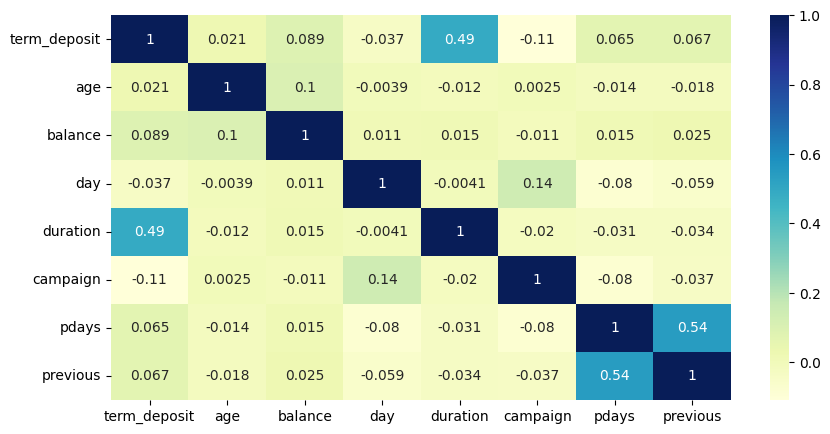

In [ ]:
#tampilkan secara visualisasi
plt.figure(figsize=(10, 5))
dataplot = sns.heatmap(df_num.corr(),cmap="YlGnBu", annot=True)
dataplot

Dari informasi diatas dapat disimpulkan bahwa:
- Korelasi antar fitur **lemah** baik untuk korelasi positif maupun korelasi negatif.
- korelasi yang tertinggi adalah (diatas 0.1 atau dibawah -0.1):

  1. term_deposit dengan previous --> korelasi lemah positif
  2. term_deposit dengan pdays --> korelasi lemah positif
  3. term_deposit dengan campaign --> korelasi lemah negatif
  4. term_deposit dengan day --> korelasi lemah negatif
  5. term_deposit dengan balance --> korelasi lemah positif
  6. term_deposit dengan age --> korelasi lemah positif
- Dapat disimpulkan bahwa hubungan linear variabel dependen dan independen terhadap `term_deposit` **lemah**


### 4-5 Distribusi Target (`term_deposit`)

Selanjutnya dilakukan visualisasi distribusi target untuk mengetahui jumlah data klien pada `term_deposit`, serta percentase dari distribusi data tersebut.

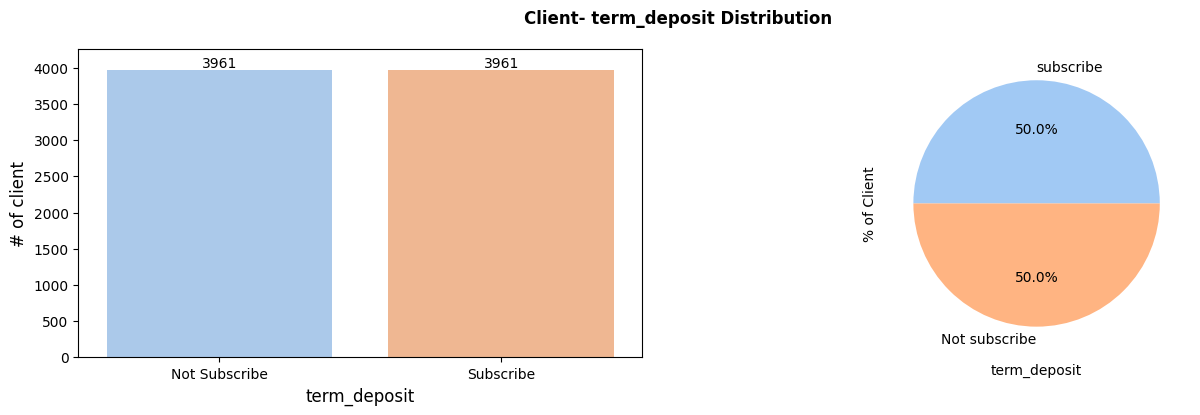

In [ ]:
# Membuat visualisasi Distribusi churn_risk_score
fig, ax =plt.subplots(1,2,figsize=(16,4))

sns.countplot(x='term_deposit', data=df_eda,palette = sns.color_palette('pastel')[0:10], ax=ax[0])
ax[0].set_xlabel("term_deposit", fontsize= 12)
ax[0].set_ylabel("# of client", fontsize= 12)
fig.suptitle('Client- term_deposit Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylim(0,4250)
plt.xlabel("term_deposit", fontsize= 10)
plt.ylabel("# of Client", fontsize= 10)
ax[0].set_xticks([0,1], ['Not Subscribe', 'Subscribe'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+100), ha='center', va='center',fontsize = 10)

df_eda['term_deposit'].value_counts().plot(kind='pie', labels = ['subscribe', 'Not subscribe'],autopct='%1.1f%%', textprops = {"fontsize":10}, colors = sns.color_palette('pastel')[0:10])
ax[1].set_ylabel("% of Client", fontsize= 10)
plt.show()

**Berdasarkan informasi diatas**, karena sebelumnya telah dilakukan resampling undersampling. Sehingga distribusi data pada term_deposit memiliki data yang sudah seimbang/balanced dan akan mencegah hasil pemodelan cenderung **not_subscribe** (data mayoritas).

### 4-6 Informasi Data Klien

#### Def Visualisasi

In [ ]:
#tampilkan histplot
def plotdrawing(feature,x,y):
    plt.figure(figsize=(x,y))
    fig_deposit = sns.histplot(data = df_eda, x = feature, hue = 'term_deposit', discrete=True, multiple="stack", palette = 'pastel')
    fig_deposit.set_ylabel('# of Client', fontsize = 13)
    fig_deposit.set_xlabel(f'{feature}', fontsize = 13)
    fig_deposit.set_title(f'deposit terhadap {feature}', fontsize = 14)
    for c in fig_deposit.containers:
        labels = [f'{h/df.deposit.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        fig_deposit.bar_label(c, labels=labels, label_type='edge')

In [ ]:
def kde(feature):
    plt.figure(figsize=(10,4))
    age_dep = sns.kdeplot(data = df_eda, x = feature, hue = 'term_deposit', multiple="stack", palette= 'pastel')
    age_dep.set_ylabel('# of clients', fontsize = 13)
    age_dep.set_xlabel(f'{feature}', fontsize = 13)
    age_dep.set_title(f'deposit terhadap {feature}', fontsize = 14)
    plt.show()

In [ ]:
#definisikan data visualisasi
def visualize(c, x,y):
    plt.figure(figsize=(x,y))
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 2,1)
    plt.title(f'{c} terhadap #deposit', fontsize=12)
    ax = sns.countplot(data = df_eda, x = c, hue="term_deposit", palette = sns.color_palette('pastel')[0:10])
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylabel("#deposit", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)

    plt.subplot(1, 2,2)
    plt.title(f'{c} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = c, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylim(0,1)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

In [ ]:
 #definisikan data visualisasi
def pieviz(c, a,b):
    plt.figure(figsize=(15,4))
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 3,1)
    plt.title(f'{c} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = c, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{c}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)


    plt.subplot(1, 3,2)
    plt.title(f'{a} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = a, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{a}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)


    plt.subplot(1, 3,3)
    plt.title(f'{b} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = b, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

In [ ]:
def countviz(a,b, f,d):
    plt.figure(figsize=(f, d))

    plt.subplot(1,2,1)
    x=[0.02 for i in range(len(list(df_eda[a].unique())))]
    plt.title(f'{a} terhadap #balance', fontsize=12)
    ax = sns.barplot( x = a, y="balance",data = df_eda, palette = sns.color_palette('pastel')[0:10], errorbar= None)
    plt.xlabel(f'{a}', fontsize= 12)
    plt.ylabel("#balance", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)


    plt.subplot(1,2,2)
    plt.title(f'{b} terhadap #balance & term_deposit', fontsize=12)
    ax = sns.barplot( x = b, y="balance",data = df_eda, palette = sns.color_palette('pastel')[0:10], errorbar= None)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.ylabel("#balance", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)

    plt.show()

In [ ]:
def time(a, b, f,d):
    plt.figure(figsize=(f, d))

    plt.subplot(1, 2, 1)
    age_dep = sns.histplot(data = df_eda, x = a, hue = 'term_deposit', multiple="stack",binwidth=30, palette= 'pastel')
    age_dep.set_ylabel('#clients', fontsize = 13)
    age_dep.set_xlabel(a, fontsize = 13)
    plt.xticks(rotation=90)
    age_dep.set_title(f'{a} terhadap term_deposit', fontsize = 14)


    plt.subplot(1, 2, 2)
    plt.title(f'{b} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = b, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

#### Age

Text(0.5, 1.0, '# % client terhadap age')

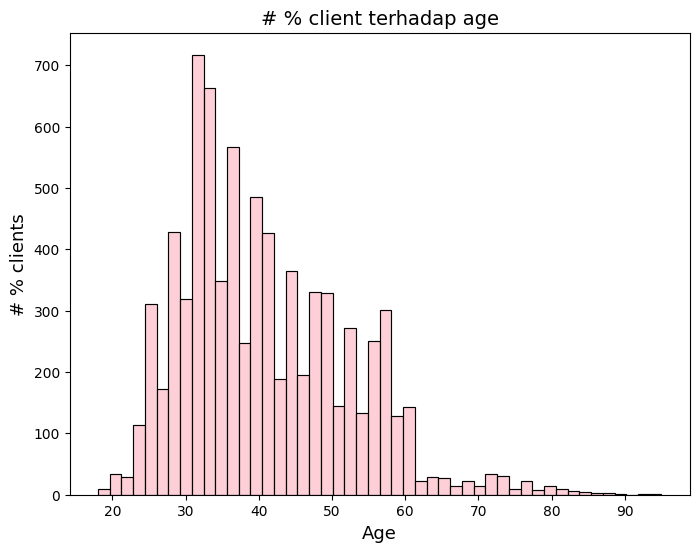

In [ ]:
#distribusi age
plt.figure(figsize=(8, 6))
age_plt = sns.histplot(data = df_eda[df_eda['age'] <= 100]['age'], color = 'pink')
age_plt.set_ylabel('# % clients', fontsize = 13)
age_plt.set_xlabel('Age', fontsize = 13)
age_plt.set_title('# % client terhadap age', fontsize = 14)

**Berdasarkan gambar tersebut:**
- Umur klien memiliki range dari 18 tahun hingga 95 tahun.
- Kebanyakan klien yang berumur 30 tahun yang menjadi klien di bank ini.

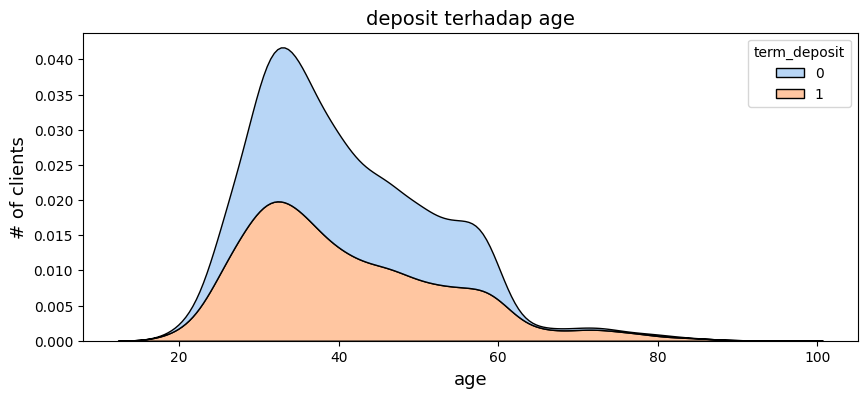

In [ ]:
kde('age')

Selanjutnya, dilakukan pembagian kategori umur (dewasa Muda, Paruh Baya, Lansia) berdasarkan [DepKes RI](http://www.e-jurnalmitrapendidikan.com/index.php/e-jmp/article/download/643/423/#:~:text=Kategori%20umur%20menurut%20Depkes%20RI,atas%20(Ramadhan%2C%202014) untuk melihat pengaruh deposit terhadap kategori umur.

In [ ]:
def ages(df_eda):
    if (18 <= df_eda['age'] <= 39) :
        return 'Dewasa Muda'
    elif (40 <= df_eda['age'] <= 59):
        return 'Paruh Baya'
    elif (60 <= df_eda['age']):
        return 'Lansia'
df_eda['Age Group'] = df_eda.apply(ages, axis = 1)

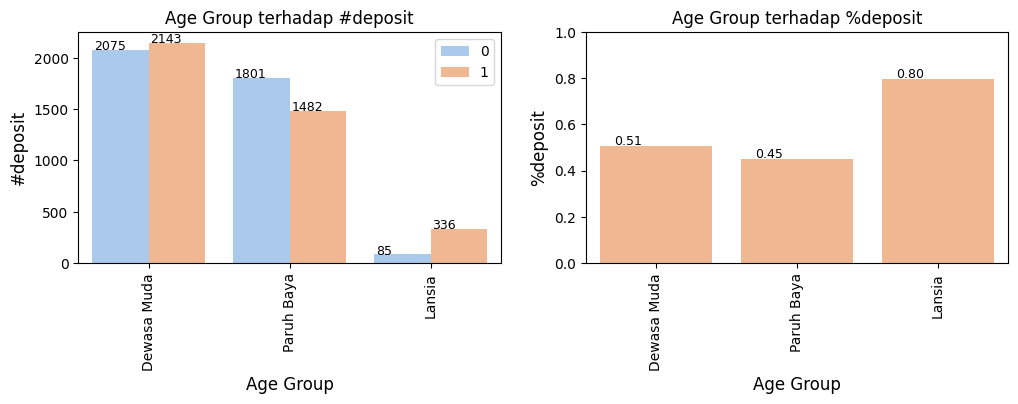

In [ ]:
#tampilkan ratio data
visualize('Age Group', 12, 3)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Kebanyakan klien yang berlangganan deposito berjangka adalah usia lansia, yaitu sebesar 79%. Hal ini karena pendapatan pasif berupa bunga dari bank sangat membantu para lansia dalam menjalani kehidupan setelah pensiun.
- Pada group dewasa muda dan paruh baya, hanya sebagian (~50%) yang berlangganan deposito berjangka

#### Job

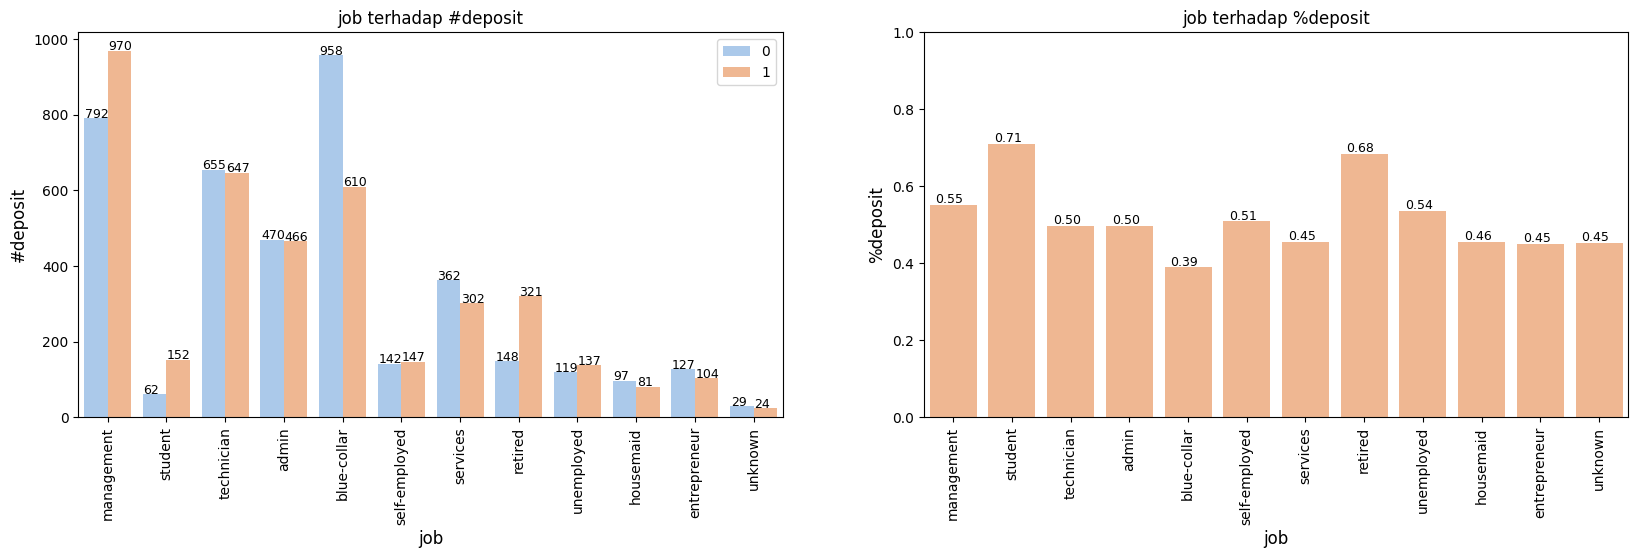

In [ ]:
#buat visualisasi feature: job, size : x,y
visualize('job', 20, 5)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Klien pada bank ini didominasi oleh pekerja blue-colar, technician dan admin
- Meskipun demikian, persentase yang berlangganan deposit berjangga didominasi oleh klien yang masih bersekolah (student) dan telah pensiun (retired)
  - Pada klien yang masih bersekolah, banyak orang tua yang telah menyiapkan tabungan untuk anaknya sejak kecil. Sehingga kebanyakan dari mereka berlangganan deposito berjangka karena terdapat passive income (bunga dari bank) yang dapat membantu pembiayaan/kebutuhan anak-anak mereka.  
  - pada klien yang telah pensiun, passive income (bunga bank) juga menguntungkan karena ketidakmampuan mereka untuk bekerja lagi.


#### Marital Status

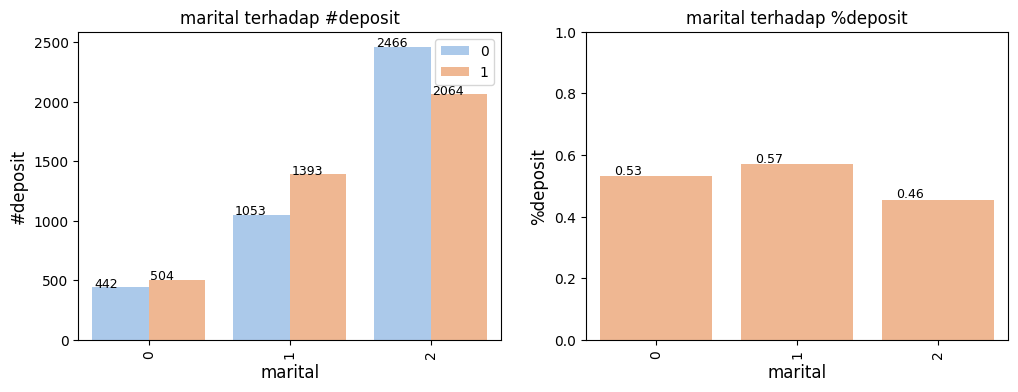

In [ ]:
#tampilkan visualisasi marital
visualize('marital', 12, 4)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- `(0: divorced, 1: single, 2: married)`
- Mayoritas klien pada bank tersebut adalah klien yang sudah menikah (2: married)
- Ketika kategori tersebut tidak memiliki perbedaan yang signifikan dalam berlangganan deposito berjangka ini.
- meskipun demikian, status pernikahan menentukan apakah seseorang akan berlangganan deposito berjangka atau tidak. single dan divorced lebih cenderung akan berlangganan pada deposito berjangka karena kebanyakan single yang masih bersekolah dan yang divorced dapat mendapatkan pasif income yang menguntungkan untuk kedua kategori tersebut.


#### Education

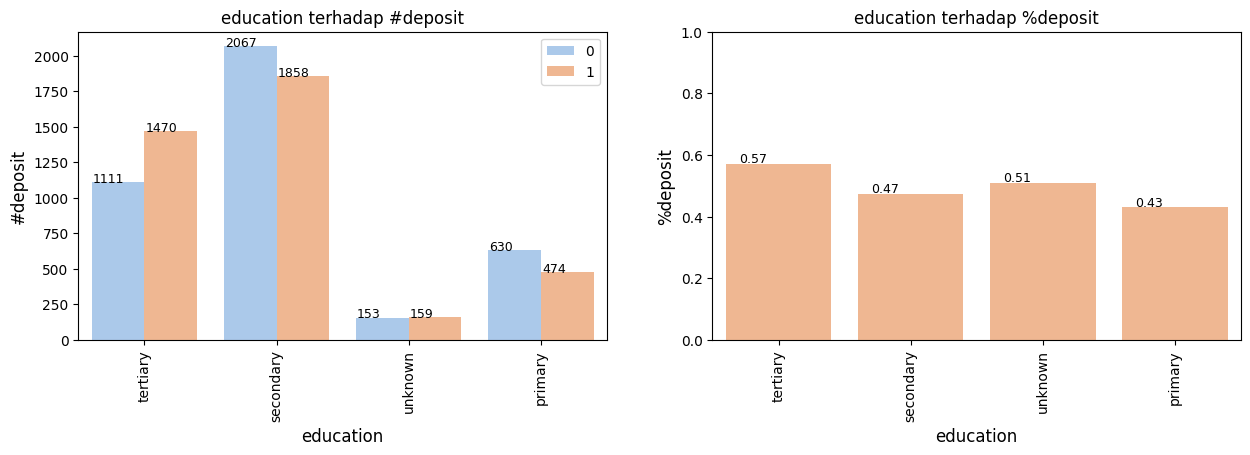

In [ ]:
#tampilkan data education
visualize('education', 15, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**

- Klien yang memiliki tingkat pendidikan tertiary memiliki kemungkinan untuk berlangganan deposito berjangka tertinggi dibandingkan dengan yang lain.
- Sementara itu, klien pada bank ini kebanyakan memiliki tingkat pendidikan secondary yang lebih cenderung untuk tidak berlangganan deposito berjangka.
- semakin tinggi tingkat pendidikan klien, semakin mungkin klien tersebut berlangganan deposito berjangka.
- Hal ini dikarenakan pada tertiary level (kuliah), gaji yang diterima oleh orang yang telah berkuliah kebanyakan lebih banyak dibandingkan dengan orang-orang yang hanya bersekolah hingga SMA. Sehingga kemungkinan untuk berlangganan deposito pada tertiary level lebih tinggi dibandingkan secondary.

### 4-7 Riwayat Default, Housing dan Loan

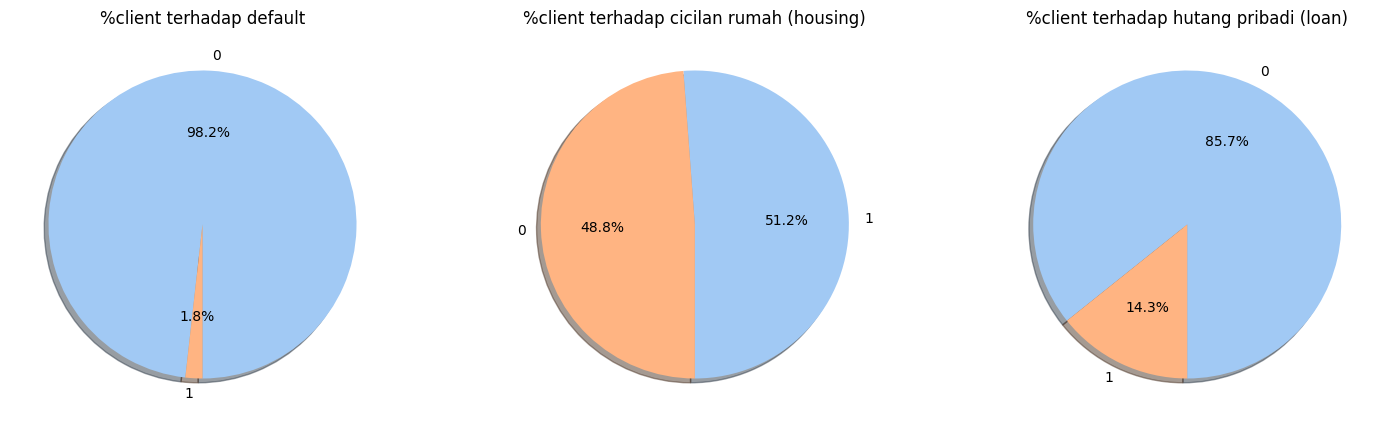

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
labels =df_eda['default'].value_counts(sort = 1).index
sizes = df_eda['default'].value_counts(sort = 1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap default',size = 12)

plt.subplot(1,3,2)
labels =df_eda['housing'].value_counts(sort = 1).index
sizes = df_eda['housing'].value_counts(sort =1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap cicilan rumah (housing)',size = 12)

plt.subplot(1,3,3)
labels =df_eda['loan'].value_counts(sort = 1).index
sizes = df_eda['loan'].value_counts(sort = 1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap hutang pribadi (loan)',size = 12)
plt.show()

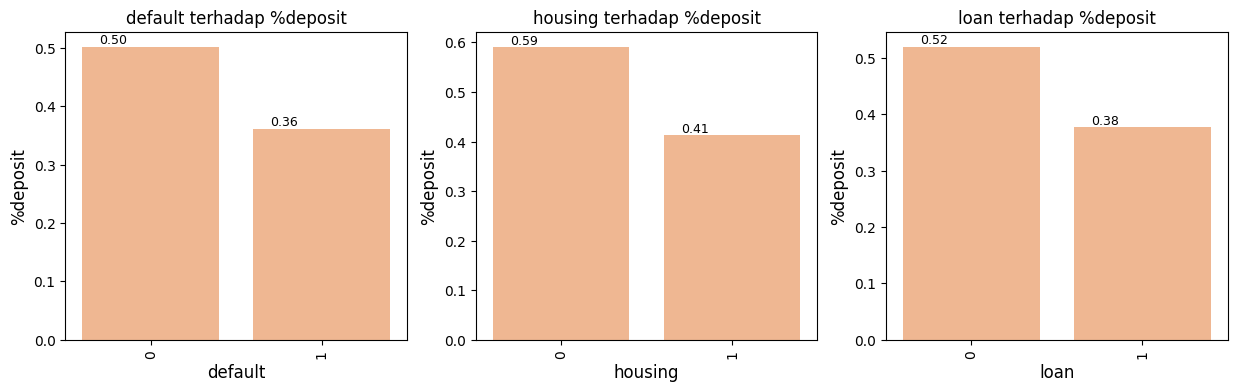

In [ ]:
#visualisasikan trehadap term_deposit
pieviz('default', 'housing', 'loan')

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- **Klien** pada bank ini** didominasi** oleh klien yang **tidak pernah default (92.8%)**, mempunyai **cicilan rumah(51.2%)**, dan **tidak punya hutang pribadi(85.7%)**.
- Sementara itu, klien yang** berlangganan deposito berjangka** adalah klien yang **tidak pernah default**, **tidak** memiliki **cicilan rumah**, dan **tidak** memiliki **hutang pribadi**
- Hal ini berarti, klien yang bebas dari hutang dan tidak pernah default 2X lebih mungkin berlangganan deposito berjangka.


### 4-8  Balance terhadap term_deposit, age, dan jobs

- **Balance**

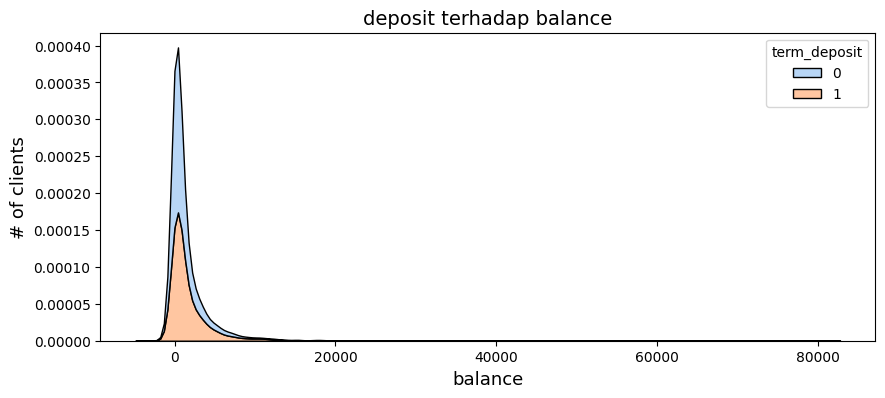

In [ ]:
#visualisasi balance terhadap deposit
kde('balance')

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- klien pada bank ini memiliki jmlah balance maksimal 85000 VDN
- Klien yang memiliki jumlah balance dibawah 20.000 VDN cenderung berlangganan deposito berjangka.

In [ ]:
#kategori balance
def balance_cat(df_eda):
    if (df_eda['balance'] < 0) :
        return 'Negative Balance'
    elif (0 <= df_eda['balance'] < 500):
        return 'Low Balance'
    elif (500 <= df_eda['balance'] < 1500):
        return 'Average Balance'
    elif (1500 <= df_eda['balance'] < 4000):
        return 'High Balance'
    elif (4000 <= df_eda['balance']):
        return 'Very High Balance'
df_eda['balance_cat'] = df_eda.apply(balance_cat, axis = 1)

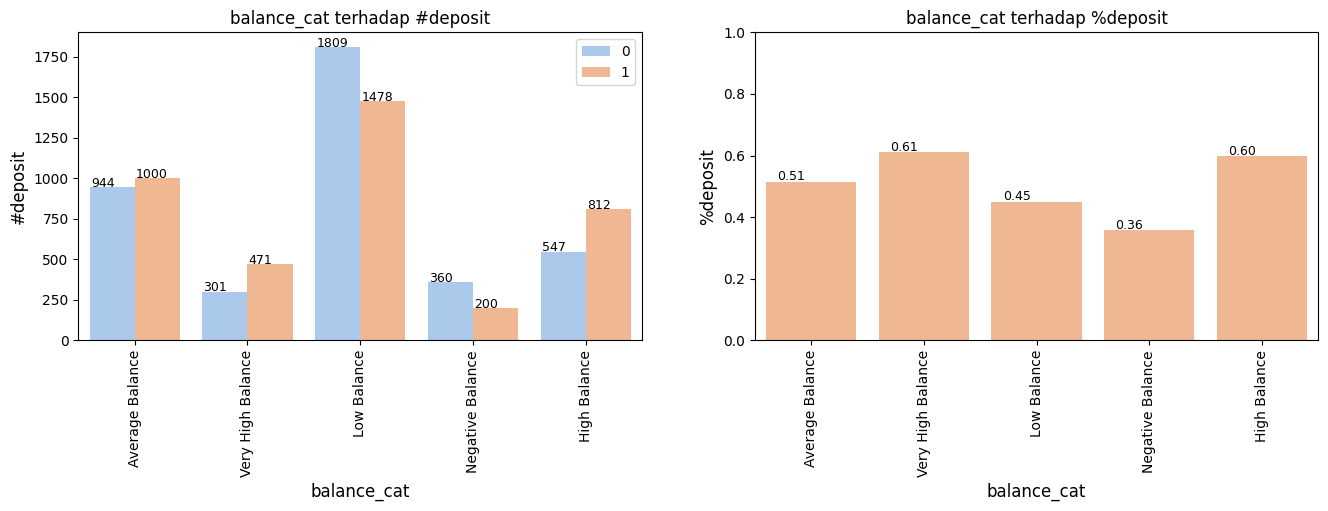

In [ ]:
#visualisasi balance terhadap deposit
visualize('balance_cat', 16, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- klien pada bank ini didominasi oleh klien yang memiliki balance yang rendah.
- **Semakin tinggi balance** klien, **semakin mungkin** klien tersebut **berlangganan deposito berjangka**

- **Balance terhadap Age Group**

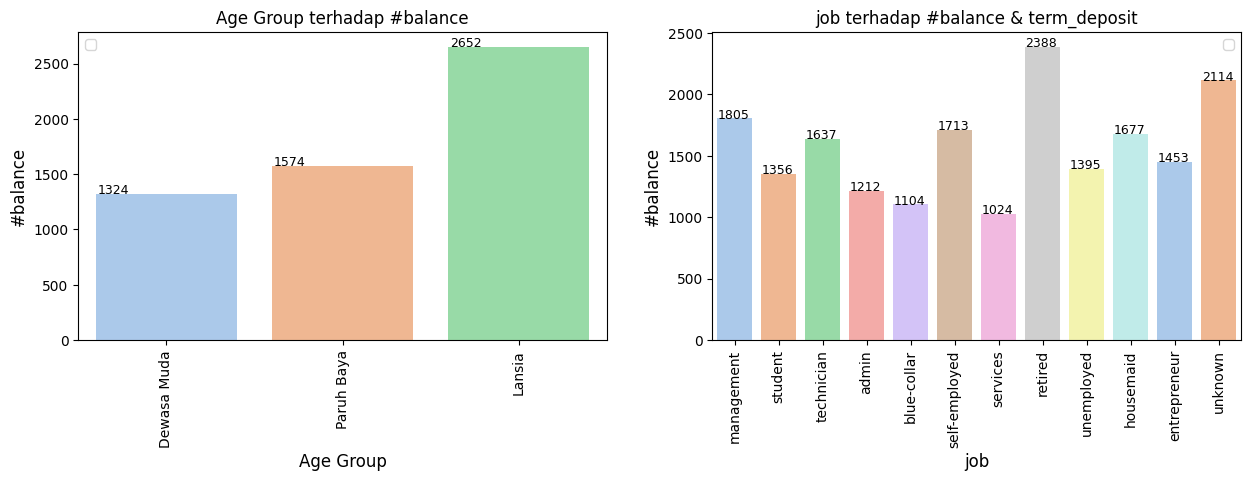

In [ ]:
#tampilkan age group terhadap balance
countviz('Age Group','job', 15, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- Lansia memiliki jumlah balance tertinggi dibanding yang lain.
- semakin tua orang tersebut, semakin besar jumlah balance yang dimiliki.
- Pekerjaan untuk kategori retired, unknown dan management merupakan kategori pekerjaan dengan jumlah balance tertinggi.

### 4-9 Day, Month, Duration, Campaign, Pdays, Previous

#### Last Contact Day

In [ ]:
#menggabungkan month dengan day
df_eda['month'] = df_eda['month'].str.capitalize()
df_eda['day'] = df_eda['day'].astype(str).str.zfill(2)
df_eda['Last_contact_day'] = df_eda['day'].astype(str) + '-' + df['month']
df_eda['Last_contact_day']  =  pd.to_datetime(df_eda['Last_contact_day'], format='%d-%b')
df_eda['Last_contact_day'] = df_eda['Last_contact_day'].dt.dayofyear

#mapping month
df_eda['month']= df_eda['month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

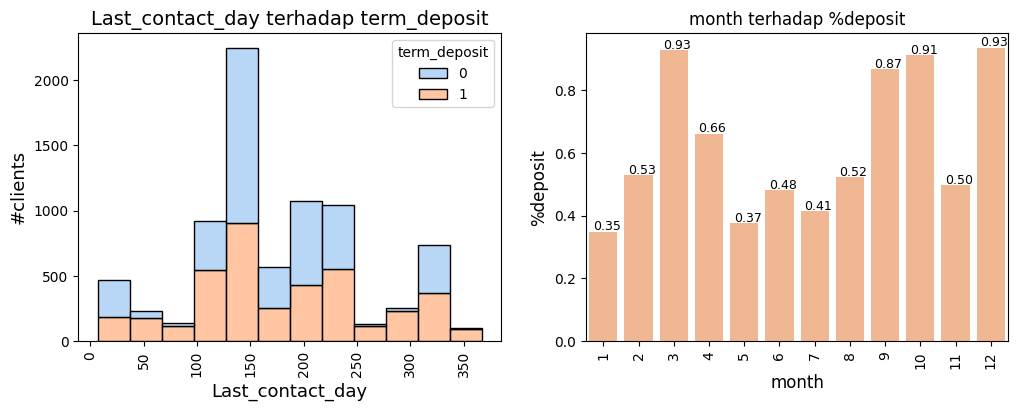

In [ ]:
#definisikan eda_num untuk feature numerik
time('Last_contact_day','month', 12, 4)

**Berdasarkan gambar tersebut, didapatkan bahwa:**

- **Day** + **month**= **last_contact_day**
  - terlihat bahwa klien terbanyak berada pada bulan **May**. Namun pada bulan tersebut memiliki persen klien yang berlangganan deposito berjangka sangat rendah. Hal ini berarti, banyak klien yang menolak penawaran untuk berlangganan.
  
  - Sehingga **bank sebaiknya lebih fokus pada bulan Maret, Desember, September, dan Oktober** yang kliennya cenderung ingin berlanggananan deposito berjangka pada bulan-bulan tersebut.
  - Pada akhir tahun, umumnya orang-orang memiliki revolusi tahunan, faktor eksternal tersebut dapat menjadi penyebab terjadinya peningkatan jumlah klien yang ingin berlangganan deposito terjangka.


#### **Duration**

In [ ]:
bins = [-1,30,90,300,600,1200,1800,2400,3000,4918]
labels =['0-30','30-90','90-300','300-600','600-1200','1200-1800','1800-2400','2400-3000','3000-']
df_eda['binned_duration'] = pd.cut(df_eda['duration'], bins,labels=labels)

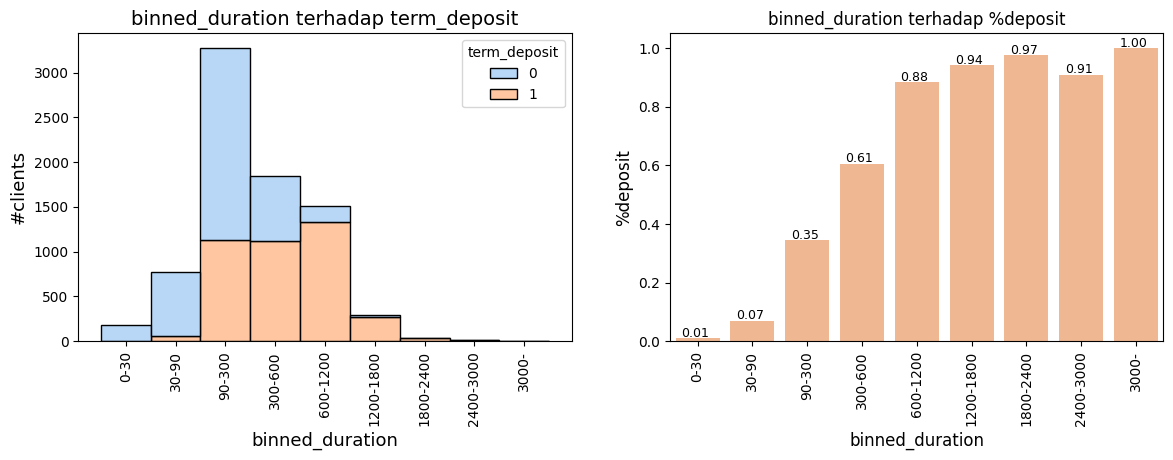

In [ ]:
#tampilkan binned duration
time('binned_duration', 'binned_duration', 14,4 )

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Klien terbanyak berada pada range (90-300). Sementara, pada range (2400-3000) merupakan persentase klien terbanyak yang subscribe deposito berjangka. Namun, data sample pada range tersebut sangat kecil.
- **Semakin lama durasi marketing, semakin besar kemungkinan klien tersebut akan berlangganan deposito berjangka.**   

#### Campaign, pdays, duration

In [ ]:
#buat bin campaign
bins = [0,1,5,10,30,50,63]
labels =['1','2-5','6-10','11-30','31-50','51-']
df_eda['binned_campaign'] = pd.cut(df_eda['campaign'], bins,labels=labels)

#buat bin pdays
bins = [-2,0,30,90,180,365,730,872]
labels =['-1','0-30','30-90','90-180','180-360','360-730','730-']
df_eda['binned_pdays'] = pd.cut(df_eda['pdays'], bins,labels=labels)

#bin duration
bins = [-1,0,1,5,20,50,100,275]
labels =['0','1','2-5','6-20','21-50','51-100','101-']
df_eda['binned_previous'] = pd.cut(df_eda['previous'], bins,labels=labels)

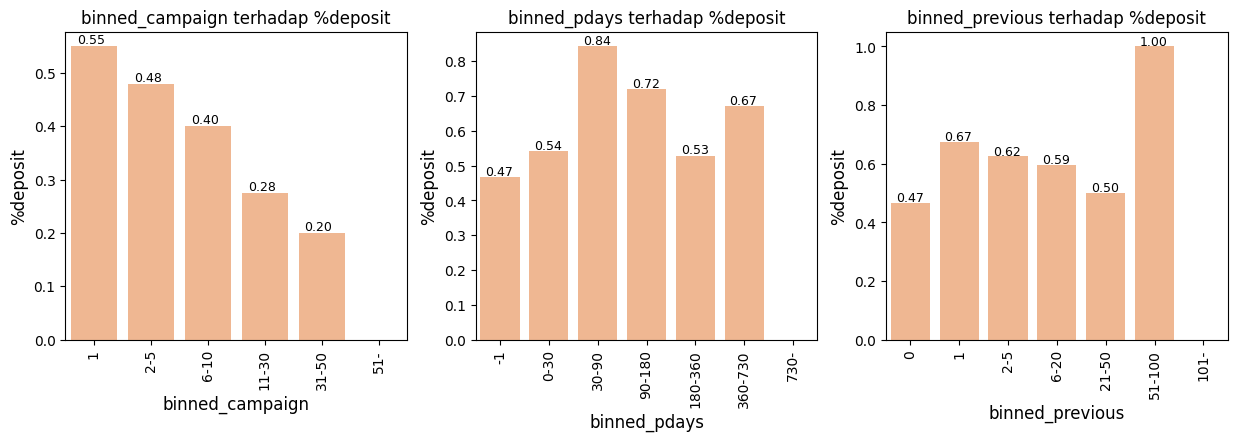

In [ ]:
#visualisasi
pieviz('binned_campaign','binned_pdays', 'binned_previous')

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- campaign
  - Klien terbanyak berada pada range (2-5). Sementara, pada 1 merupakan persentase klien terbanyak yang subscribe deposito berjangka.
  - **Semakin sedikit kontak yang dihubungi selama sedang memasarkan produk, semakin besar pula kemungkinan klien akan berlangganan deposito berjangka**

- Pdays
  - Klien cenderung menerima tawaran untuk berlangganan dengan deposito berjangka setelah 30-90 hari dikontak lagi oleh tim marketing.
  - **Klien yang tidak dikontak lagi** oleh tim marketing, cenderung **tidak akan berlangganan deposito berjangka**.

- previous
  - klien yang dikontak oleh tim marketing hingga 51-100 kali sebelumnya memiliki kemungkinan untuk berlangganan deposito berjangka.
  - nilai tersebut bernilai 100% karena hanya terdiri dari 3 klien. Sehingga perlu diinvestigasi lebih dalam
  - **Semakin sering tim marketing menghubungi klien, semakin besar pula kemungkinan klien tersebut akan berlangganan.**


---
**Notes:**
 - Berdasarkan EDA yang telah dilakukan, fitur yang akan digunakan adalah age, job, marital, education, default, balance, housing, loan, Last_contact_day, duration, campaign, pdays, previous


# DEEP LEARNING

## 5 - Feature Engineering



---


**Notes:**
Pada feature Engineering akan dilakukan:
1. split data
2. handle outlier
3. handle nilai missing
4. Seleksi fitur
5. feature scalling


---



Selanjutnya dilakukan feature engineering untuk membuat pemodelan. Namun sebelumnya, dibuat variabel baru RS agar pemanggilan random_state lebih mudah.

In [ ]:
df= dfs.copy()

In [ ]:
#menggabungkan month dengan day
df['month'] = df['month'].str.capitalize()
df['day'] = df['day'].astype(str).str.zfill(2)
df['last_contact_day'] = df['day'].astype(str) + '-' + df['month']
df['last_contact_day']  =  pd.to_datetime(df['last_contact_day'], format='%d-%b')
df['last_contact_day'] = df['last_contact_day'].dt.dayofyear


#mapping month
df['month']= df['month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
#ubah tipe data ke numerik
df['last_contact_day'] = df['last_contact_day'].astype(int)
df['day'] = df['day'].astype(int)
df['month']=df['month'].astype(int)

In [ ]:
#buat variabel random state
RS=27

### 5-1 Split X (Features) dan y(Target)

Data dilakukan split antara features dan target agar tidak terjadi kebocoran data. Data y (target) adalah `term_deposit` dan X adalah keseluruhan feature (kecuali data target)

In [ ]:
#split data menjadi X, y
X= df.drop(['term_deposit'], axis=1)
y=df['term_deposit']

In [ ]:
#tampilkan data X
X.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
0,5305,30,management,1,tertiary,0,1243,1,0,23,5,135,1,-1,0,143
1,39400,28,student,1,secondary,0,5916,0,0,22,5,259,1,63,5,142
2,15545,29,management,1,secondary,0,0,0,1,21,7,463,2,-1,0,202
3,5000,32,technician,1,unknown,0,317,1,0,21,5,394,2,-1,0,141
4,31865,54,admin.,2,primary,0,546,1,0,9,4,40,1,-1,0,99


In [ ]:
#tampilkan data y
y

0       0
1       0
2       0
3       0
4       0
       ..
7917    1
7918    1
7919    1
7920    1
7921    1
Name: term_deposit, Length: 7922, dtype: int64

### 5-3 Split antara Train-set, Val-set dan Test-set

Selanjutnya lakukan split train-set, val-set dan test-set dengan persentase
- train_val: 85%
- test-set: 15%.

Train_val set akan displit lagi menjadi:
- train-set: 85%
- test-set: 15%.

Karena data telah seimbang(balance), sehingga tidak perlu menggunakan stratify.

In [ ]:
# Split antara Train-Set, Val-Set, dan Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15,random_state=RS)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=RS)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5723, 16)
Val Size :  (1010, 16)
Test Size :  (1189, 16)


In [ ]:
#tampilkan hasil split
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
183,989,38,technician,2,secondary,0,0,0,0,7,5,55,1,-1,0,127
7105,40652,36,management,2,tertiary,0,495,0,0,5,8,157,3,97,2,217
7486,41729,24,blue-collar,1,secondary,0,1857,1,0,8,10,147,1,92,5,281
815,2737,39,entrepreneur,2,secondary,0,580,1,0,14,5,323,4,-1,0,134
7740,42266,63,management,2,tertiary,0,5112,0,0,13,11,2184,2,95,3,317


In [ ]:
#tampilkan hasil split
X_val.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
764,39595,36,technician,2,secondary,0,15485,0,0,26,5,83,1,42,1,146
3286,38972,32,management,1,tertiary,0,229,1,0,18,5,345,1,-1,0,138
5801,31651,40,management,2,secondary,0,754,0,1,6,4,635,1,-1,0,96
2842,38906,40,entrepreneur,2,secondary,0,285,0,0,18,5,261,1,178,1,138
1787,13624,43,technician,0,primary,0,13,0,1,9,7,977,4,-1,0,190


In [ ]:
#tampilkan hasil split
X_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
1472,23820,53,admin.,2,secondary,0,578,0,0,29,8,59,2,-1,0,241
4451,13068,52,entrepreneur,2,tertiary,1,-468,0,0,8,7,534,1,-1,0,189
469,28796,36,blue-collar,2,secondary,0,160,1,0,30,1,344,2,-1,0,30
4426,12651,29,services,1,primary,0,339,0,0,4,7,1576,3,-1,0,185
1858,23697,35,technician,2,secondary,0,-78,0,0,28,8,102,13,-1,0,240


### 5-4 Handling Outlier


Selanjutnya adalah handling outlier pada variabel X_train dan X_val. Pertama, melakukan pengecekan pada setiap fitur numerik untuk mengetahui apakah terdapat outlier atau tidak.

#### Outlier X_train

In [ ]:
#fungsi untuk menampilkan outlier pada masing-masing variabel yang ditentukan.
def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(20, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

In [ ]:
#variabel yang ingin dicek outliernya
check_outlier_columns= ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'month', 'last_contact_day']

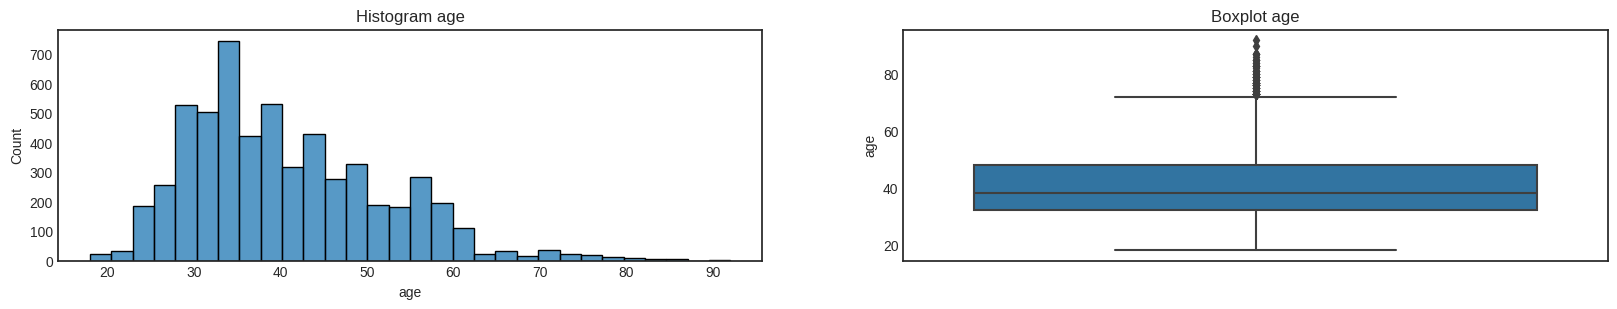

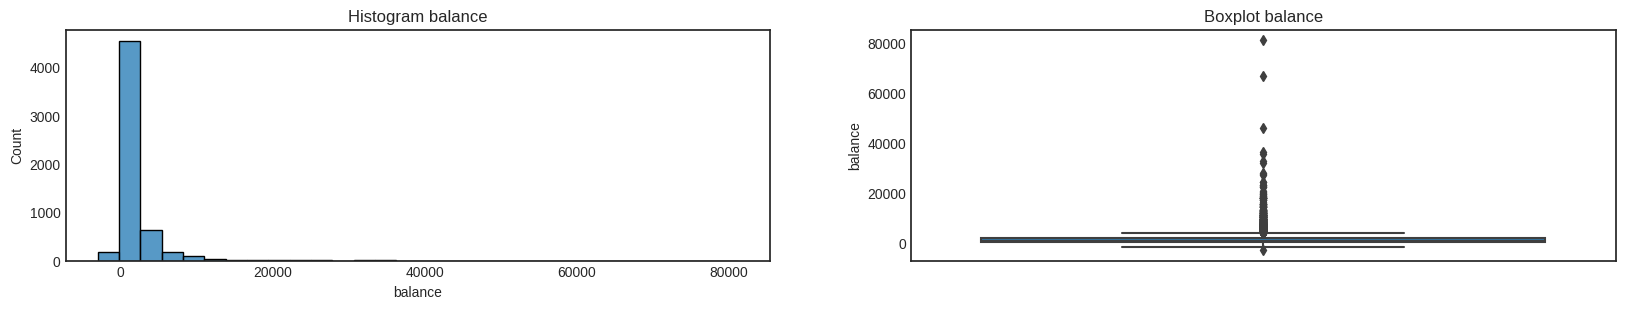

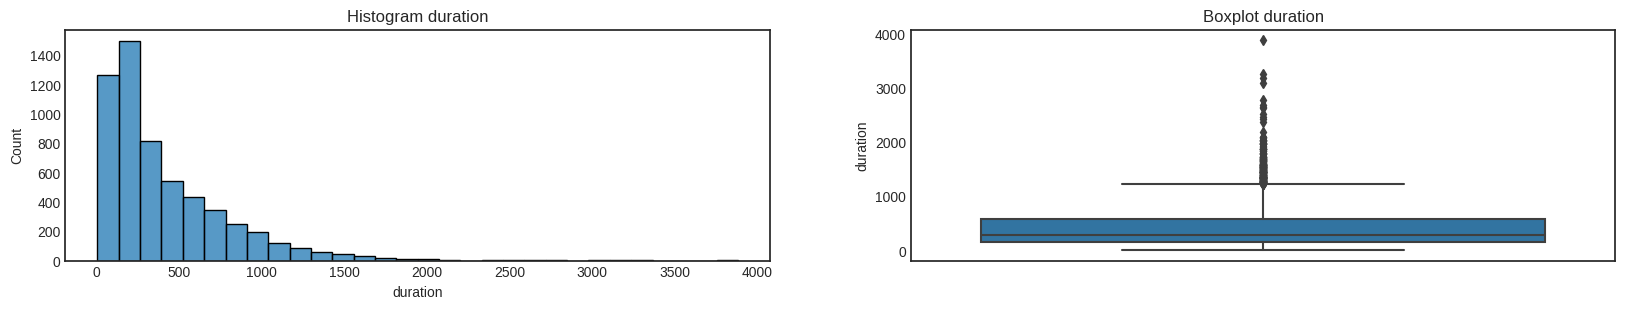

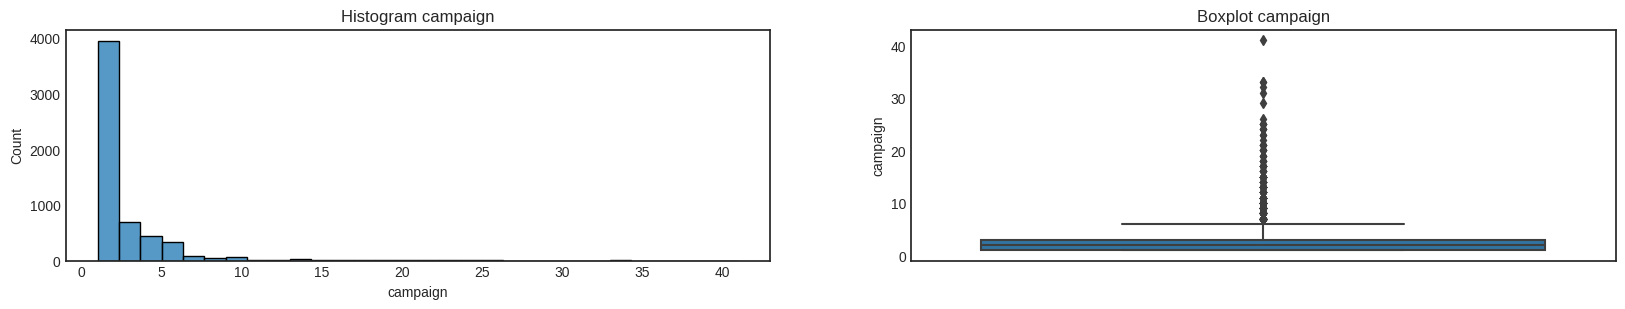

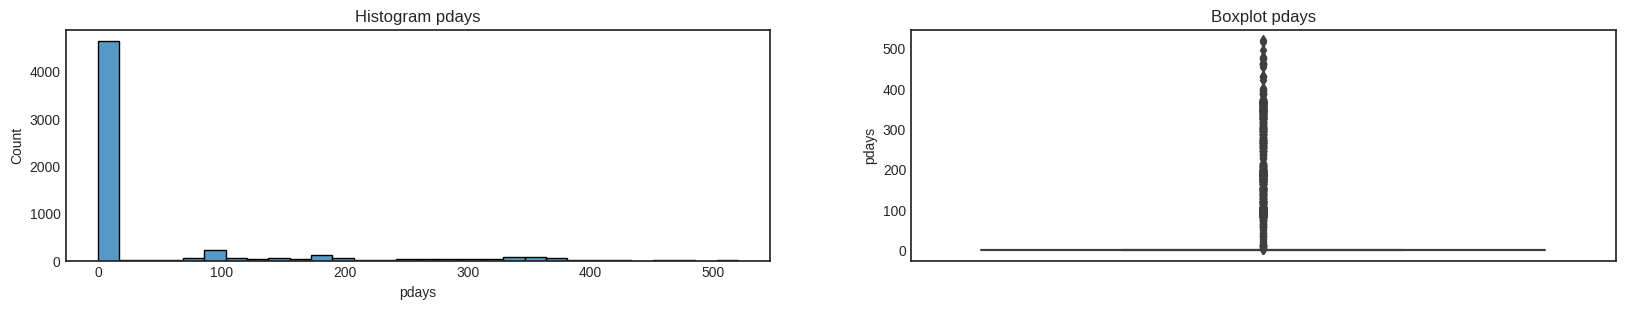

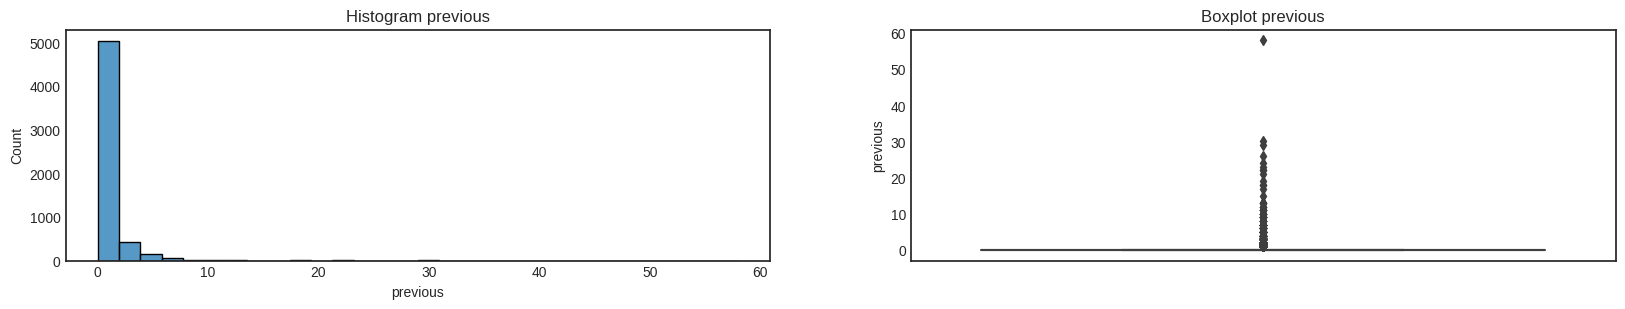

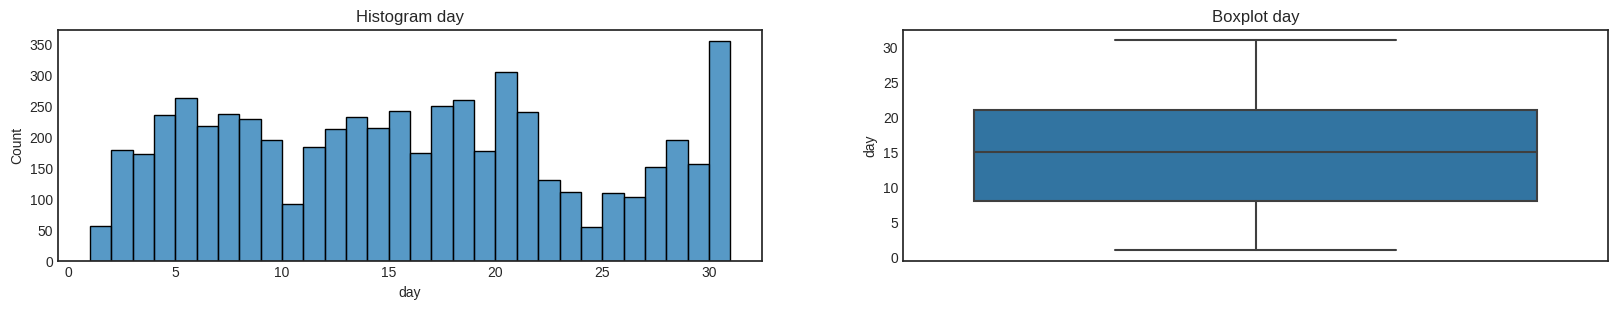

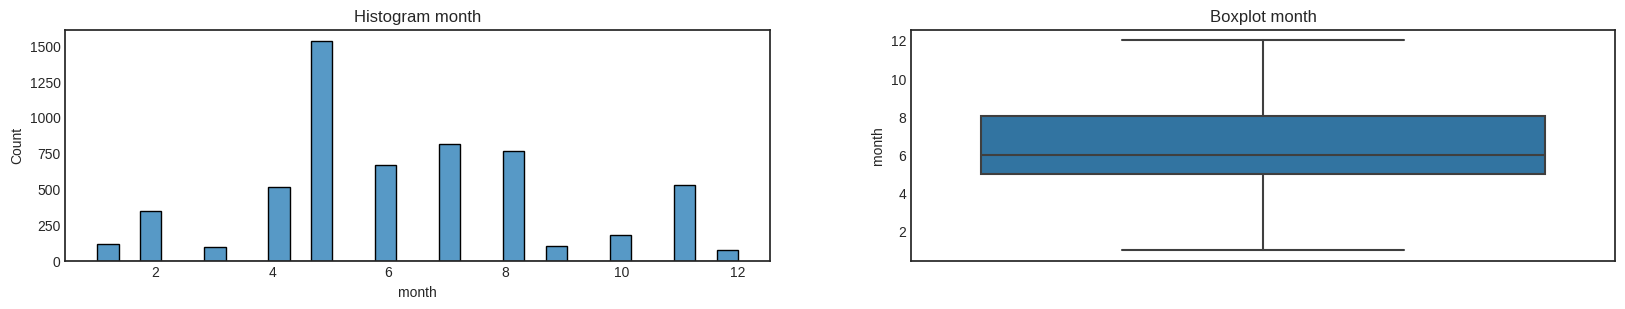

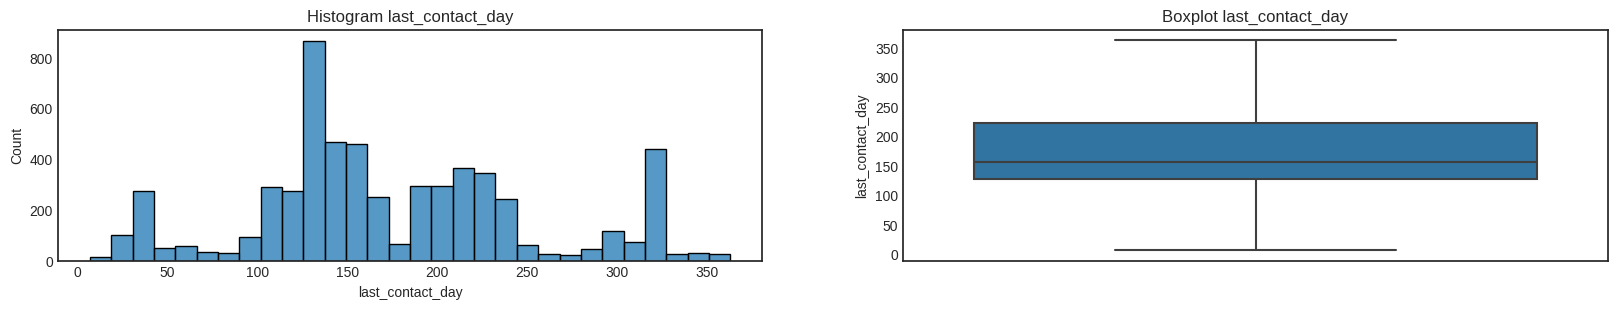

In [ ]:
#tampilkan distribusi dari masing-masing numerik-outlier
for i in check_outlier_columns :
    diagnostic_plots(X_train, i)

Kemudian lakukan pengecekan pada persentase outlier dari setiap fitur.

In [ ]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    #Cek skew feature
    global interq
    global lower_boundary
    global upper_boundary
    skew = df[variable].skew()
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary, skew

In [ ]:
#tampilkan informasi data oulier
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier:' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier:' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Skew:' ,round((outliers_check(X_train, i)[3]),2))
    print('Lower Boundary:' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary:' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

age
Jumlah Outlier: 76
Persentase Outlier: 1.33
Skew: 0.83
Lower Boundary: 8.0
Upper Boundary: 72.0
---
balance
Jumlah Outlier: 289
Persentase Outlier: 5.05
Skew: 8.0
Lower Boundary: -4415.0
Upper Boundary: 6130.5
---
duration
Jumlah Outlier: 33
Persentase Outlier: 0.58
Skew: 1.93
Lower Boundary: -1148.5
Upper Boundary: 1872.0
---
campaign
Jumlah Outlier: 135
Persentase Outlier: 2.36
Skew: 4.72
Lower Boundary: -5.0
Upper Boundary: 9.0
---
pdays
Jumlah Outlier: 1105
Persentase Outlier: 19.31
Skew: 2.5
Lower Boundary: -1.0
Upper Boundary: -1.0
---
previous
Jumlah Outlier: 1105
Persentase Outlier: 19.31
Skew: 10.06
Lower Boundary: 0.0
Upper Boundary: 0.0
---
day
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.16
Lower Boundary: -10.02
Upper Boundary: 40.74
---
month
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.3
Lower Boundary: -1.22
Upper Boundary: 13.78
---
last_contact_day
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.34
Lower Boundary: -56.88
Upper Boundary: 406.68
---


Berdasarkan gambar dan pengecekan outlier, `day` tidak memiliki outlier, sehingga tidak perlu dilakukan handling. Sementara untuk feature lainnya, masing-masing feature memiliki skewed yang berbeda-beda. Sehingga, akan dihandling terpisah.

Sebelum melakukan handling outlier, data yang diolah perlu disalin terlebih dahulu agar data tidka hilang.

In [ ]:
#buat variable baru terlebih dahulu
X_train_clean= X_train.copy()

##### ***Handling outlier `age`***

Outlier pada fitur ini berjumlah 74 (1.29% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier age
outlier_age = outliers_check(X_train_clean,'age')[0]
outlier_age['age'].describe()

count    76.000000
mean     78.210526
std       4.625482
min      73.000000
25%      74.000000
50%      77.000000
75%      81.000000
max      92.000000
Name: age, dtype: float64

Terlihat bahwa outliers pada age merupakan outliers dari klien yang memiliki usia rata-rata 74 tahun/retired. Berdasarkan pada poin EDA, terlihat bahwa distribusi age untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang lemah yaitu sebesar 0.021. Meskipun demikian, data outlier tersebut merupakan natural outliers karena klien yang bergabung dengan bank tersebut diperbolehkan dari berbagai jenis umur, sehingga akan dihandle dengan winsorizer.

##### ***Handling Outlier pada `balance`***

Pada fitur balance, terdapat 5.28% outlier dengan skewed ke arah ekstrim positif.

In [ ]:
#group data untuk melihat korelasi
df_eda.groupby(['term_deposit','balance'],sort=True)['balance'].count()

term_deposit  balance
0             -3313      1
              -1941      1
              -1737      1
              -1613      1
              -1224      1
                        ..
1              34646     1
               36252     1
               45248     1
               52587     1
               81204     1
Name: balance, Length: 4151, dtype: int64

Semakin besar nilai balance yang dimiliki, semakin mungkin seseorang tersebut melakukan term_deposit

In [ ]:
# Check statistik deskriptif untuk outlier
outlier_balance = outliers_check(X_train_clean,'balance')[0]
outlier_balance['balance'].describe()

count      289.000000
mean     11351.764706
std       7613.551478
min       6138.000000
25%       7303.000000
50%       9301.000000
75%      12114.000000
max      81204.000000
Name: balance, dtype: float64

Berdasarkan EDA, semakin besar nilai balance semakin mungkin klien tersebut akan subscribe term_deposit. Selain itu, outlier tersebut merupakan outlier yang termasuk natural karena nilai balance dari masing-masing klien berbeda-beda. Namun karena pemodelan machine learning sensitif terhadap outlier maka, data tersebut akan dihandle dengan winsorizer.

##### ***Handling Outlier pada `campaign`***

Pada fitur campaign, terdapat 2.67% outlier dengan skewed ke arah ekstrim positif. karena outlier cukup besar sehingga data tersebut akan dihandle dengan winsorizer.

In [ ]:
# Check statistik deskriptif untuk outlier

outlier_campaign = outliers_check(X_train_clean,'campaign')[0]
outlier_campaign['campaign'].describe()


count    135.000000
mean      15.222222
std        5.764879
min       10.000000
25%       11.000000
50%       13.000000
75%       17.000000
max       41.000000
Name: campaign, dtype: float64

Karena kedua fitur ini tidak memiliki nilai skewed yang tinggi/ekstrim, sehingga metode iqr yang dipilih adalah 1.5 pada kedua tail.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['balance', 'campaign']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='gaussian',tail='left',fold=31.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)
X_test =windsoriser.transform(X_test)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)

X_train Shape :  (5723, 16)
X_train_clean Shape :  (5723, 16)


##### ***Handling outlier `duration`***

Outlier pada fitur ini berjumlah 36 (0.63% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier age

outlier_duration = outliers_check(X_train_clean,'duration')[0]
outlier_duration['duration'].describe()

count      33.000000
mean     2294.878788
std       488.272193
min      1877.000000
25%      1971.000000
50%      2033.000000
75%      2516.000000
max      3881.000000
Name: duration, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

###### ***Winsorizer Outlier `campaign`, `balance`, `campaign`, `duration`***

Handling pada fitur ini dengan winzorizer seperti pada X_train.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['age','duration', 'balance','campaign']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)

#transform X_test
X_test =windsoriser.transform(X_test)

# Transform X_val
X_val = windsoriser.transform(X_val)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train Shape :  (5723, 16)
X_train_clean Shape :  (5723, 16)
X_val :  (1010, 16)
X_test :  (1189, 16)


##### ***Handling outlier `pdays`***

Outlier pada fitur ini berjumlah 1105 (19.01% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier

outlier_pdays = outliers_check(X_train_clean,'pdays')[0]
outlier_pdays['pdays'].describe()

count    1105.000000
mean      201.605430
std       110.118793
min         2.000000
25%        98.000000
50%       183.000000
75%       302.000000
max       520.000000
Name: pdays, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi pdays untuk klien yang subscribe dan tidak subscribe (term_deposit) tidak memiliki korelasi yang tinggi yaitu sebesar 0.065. Karena korelasi tidak terlalu tinggi dan outlier yang ada sangat banyak, sehingga akan sebaiknya fitur ini di drop. Jika outlier di drop, pemodelan akan kehilangan 20% dari data tersebut.

##### ***Handling outlier `previous`***

Outlier pada fitur ini berjumlah 1005 (19.31% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier previous

outlier_previous = outliers_check(X_train_clean,'previous')[0]
outlier_previous['previous'].describe()

count    1105.000000
mean        2.912217
std         3.429476
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        58.000000
Name: previous, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

In [ ]:
#fitur yang akan disensor
#winsorizer_columns = ['previous', 'pdays']

In [ ]:
#definisikan sensoring winsorizer
#windsoriser = Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
##X_train_clean = windsoriser.fit_transform(X_train_clean)

#transform X_test
#X_test =windsoriser.transform(X_test)

# Transform X_val
#X_val = windsoriser.transform(X_val)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train Shape :  (5723, 16)
X_train_clean Shape :  (5723, 16)
X_val :  (1010, 16)
X_test :  (1189, 16)


Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

##### Visualisasi Hasil Handle Outlier

In [ ]:
#variabel yang ingin dicek outliernya
check_outlier_columns= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

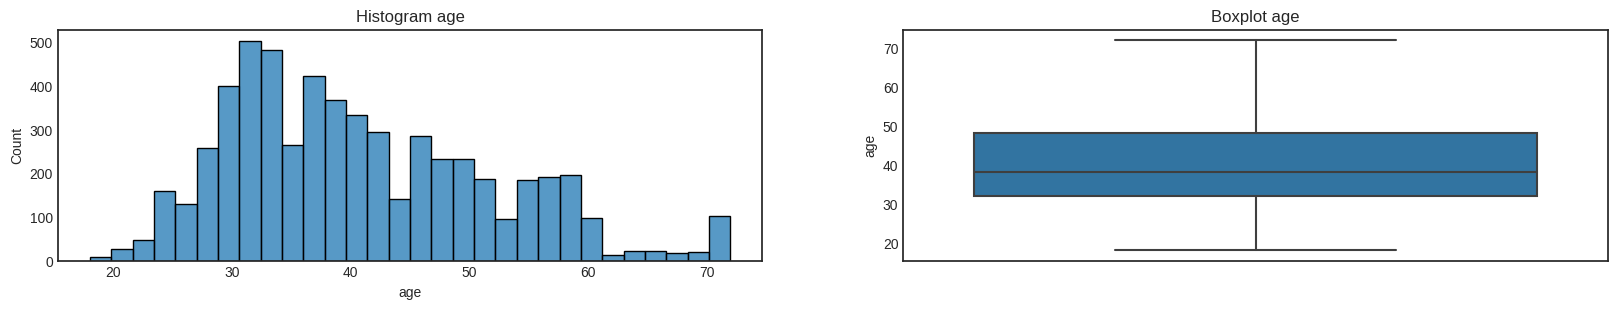

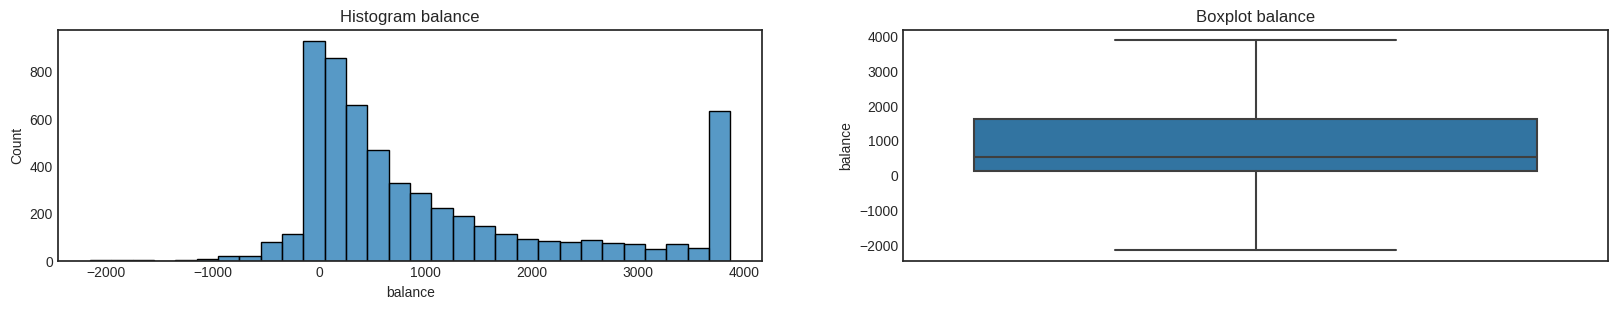

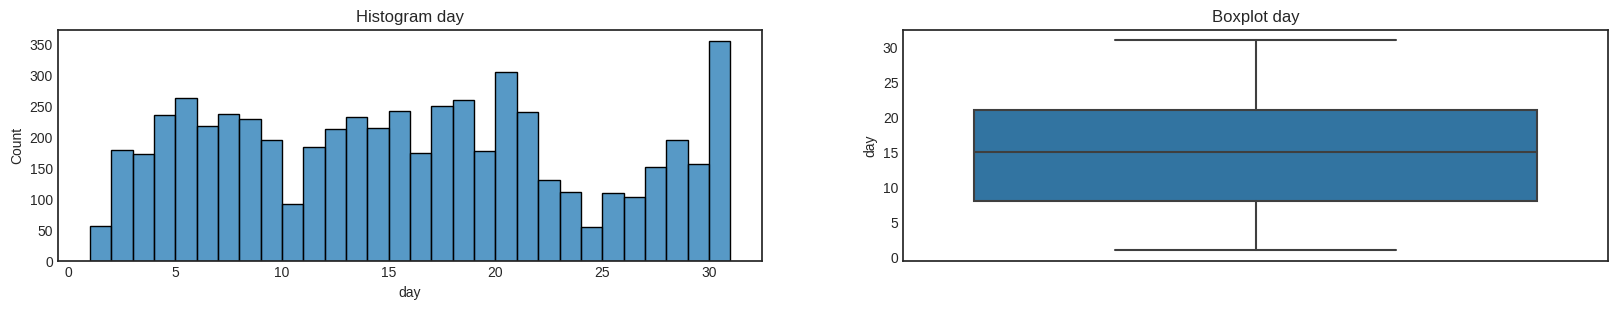

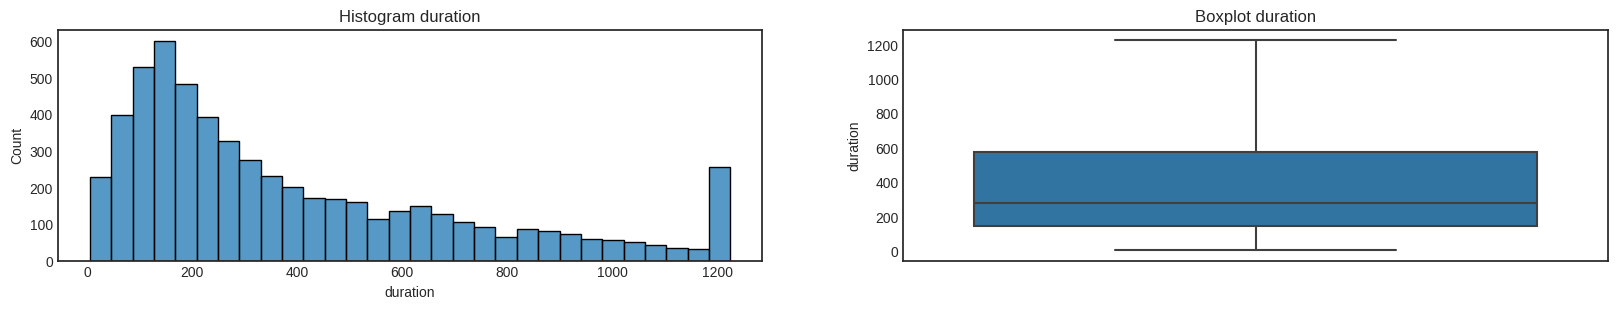

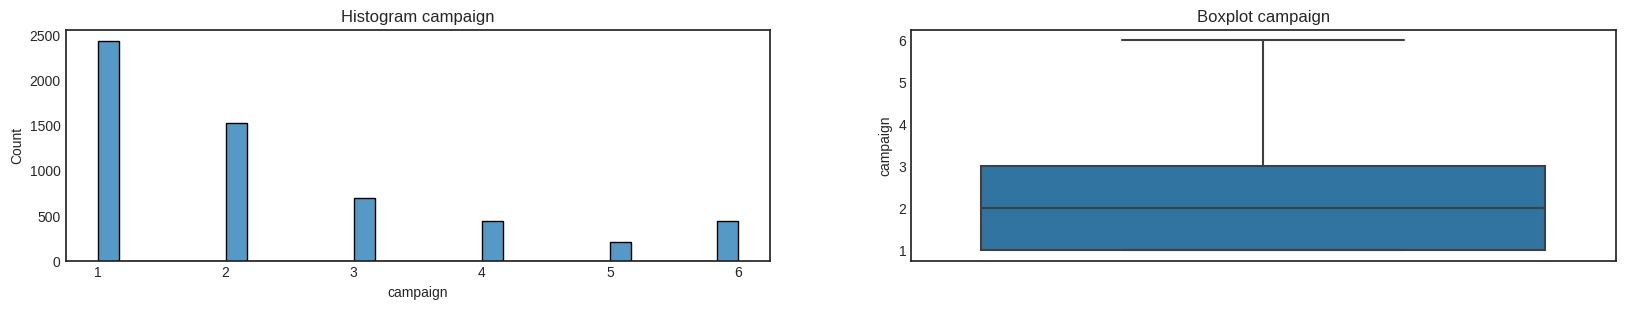

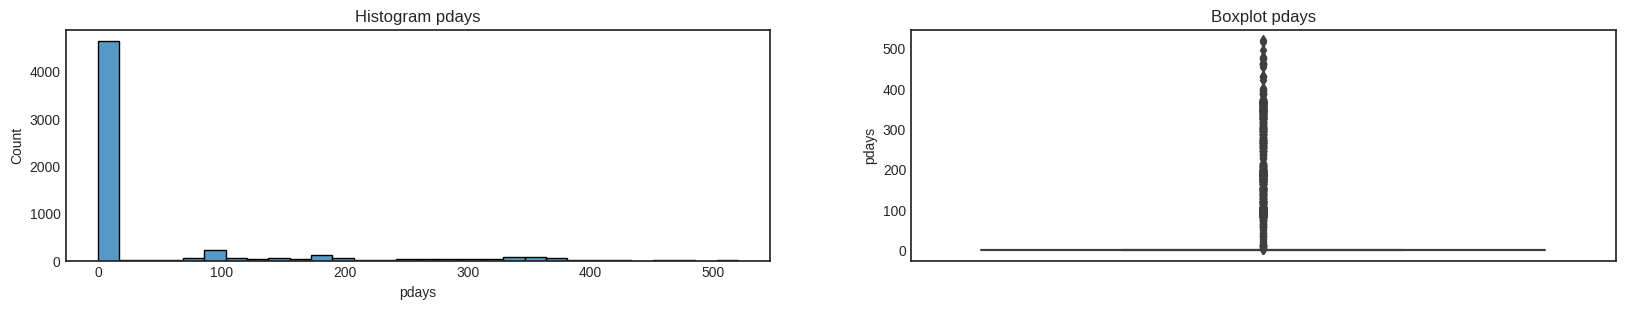

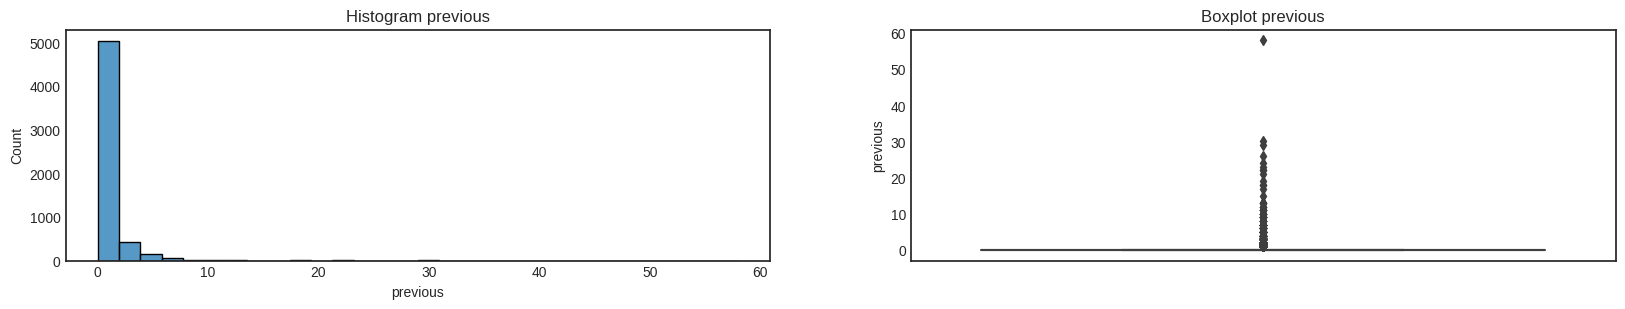

In [ ]:
#tampilkan distribusi dari masing-masing numerik-outlier
for i in check_outlier_columns :
    diagnostic_plots(X_train_clean, i)

### 5-6 Cek cardinality

Sebelum melakukan feature selection, perlu dilakukan pengecekan tingkat cardinality pada data kategori.

In [ ]:
#Tampilkan nama kolom dari data objek keseluruhan pada X_train sebagai patokan
data_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
data_categorical

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

In [ ]:
#cek jumlah cardinality
print('Jumlah Kolom dan baris: ', X_train_clean[data_categorical].shape)
print('')

for col in X_train_clean[data_categorical].columns.tolist():
  print('Col : ', col)
  print('Jumlah data unik : ', X_train_clean[data_categorical][col].nunique())

Jumlah Kolom dan baris:  (5723, 7)

Col :  job
Jumlah data unik :  12
Col :  marital
Jumlah data unik :  3
Col :  education
Jumlah data unik :  4
Col :  default
Jumlah data unik :  2
Col :  housing
Jumlah data unik :  2
Col :  loan
Jumlah data unik :  2
Col :  month
Jumlah data unik :  12


Berdasarkan pengecekan cardinality, feature 'month' dan 'day' merupakan fitur yang sama dan dapat digabung. Sehingga perlu dilakukan penggabungan dan kedua fitur tersebut akan di-drop.

In [ ]:
#drop feature redundant dan tinggi cardinality
redundant_drop = ['ID']
X_train_clean.drop(columns=redundant_drop,inplace=True)
X_val.drop(columns=redundant_drop,inplace=True)
X_test.drop(columns=redundant_drop,inplace=True)

#tampilkan jumlah data dan kolom pada train-set
print('X_train:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

X_train: (5723, 15)
X_val: (1010, 15)
X_test: (1189, 15)


In [ ]:
#Tampilkan nama kolom dari data objek keseluruhan setelah id di drop
data_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
data_categorical

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

### 5-7 Feature Selection

Feature selection adalah proses untuk mengurangi jumlah variabel input ketika melakukan prediksi pemodelan. Feature selection akan dilakukan pada data numerik (numerical feature) dan data kategorikal(categorical features).

- Pada numerical feature, teknik korelasi yang digunakan adalah :
  - ANOVA / korelasi linear.
- Sementara pada categorical feature, teknik yang digunakan adalah:
  - Chi-Squared test (tabel kontigensi) ([reference](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/))

In [ ]:
#1.copy variabel data agar tidak hilang menjadi _fs(feature selection)
X_train_fs= X_train_clean.copy()
y_train_fs= y_train.copy()

In [ ]:
X_train_fs.reset_index(drop=True)
y_train_fs.reset_index(drop=True)

0       0
1       1
2       1
3       0
4       1
       ..
5718    0
5719    0
5720    0
5721    0
5722    1
Name: term_deposit, Length: 5723, dtype: int64

Selanjutnya,tentukan mana fitur numerik dan kategorikal. Dilakukan secara manual karena terdapat data bertipe integer, namun sebenarnya data tersebut adalah kategorikal.

In [ ]:
#2.panggil nama fitur terhadap tipe datanya
fs_numerik = ['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous', 'last_contact_day']
fs_kategorik = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

Sebelum dilakukan Feature Selection Perlu dilakukan scaling dan encoding untuk dapat diproses dengan teknik ANOVA dan chi-squares.

Tipe encoding yang digunakan adalah MinMaxScaller karena data yang dihasilkan sama seperti data setelah di handling outlier (terdistribusi normal). Sementara itu, encoding yang digunakan adalah LabelEncoding karena ingin langsung mengubah data sesuai dengan fitur yang ada pada variabel, tanpa menambah/mengurangi fitur.

In [ ]:
#3.pisahkan data numerik dan kolom pada X_train_fs
X_train_numerik = X_train_fs[fs_numerik]
X_train_kategorik = X_train_fs[fs_kategorik]

In [ ]:
#4.lakukan scaling dan encoding
scaler_fs = MinMaxScaler()
#5.fit transform train kategorik
fs_encode= X_train_kategorik.apply(LabelEncoder().fit_transform)
#6.fit transform train numerik
fs_scaled = pd.DataFrame(scaler_fs.fit_transform(X_train_numerik),columns= fs_numerik, index=X_train_numerik.index)

##### Feature Selection Numerik

Digunakan metode f_classif (ANOVA) untuk menghitung korelasi antara fitur numerik dan kategorikal.

Berikut adalah hipotesis 0 dan hipotesis 1 dengan (alpha: 0.05, confidence level : 0.95)

H0= tidak ada perbedaan variansi sinifikan pada target

H1= ada perbedaan variansi yang sinifikan pada target

In [ ]:
#1. definisikan anova
select_numerik = SelectKBest(score_func=f_classif, k='all')
#2. fit data yang telah discaling dengan y_train
score_numerik = select_numerik.fit(fs_scaled, y_train)

In [ ]:
#3. Selanjutnya adalah print score, mean score dan feature
print('Score setiap feature: ', score_numerik.scores_)
print('Rata-Rata score: ', score_numerik.scores_.mean())
#4. Kemudian pembuatan dataframe untuk mempermudah interpretasi
df_score_num = pd.DataFrame([X_train_fs[fs_numerik].keys(),score_numerik.scores_,score_numerik.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
#5.buat batas sesuai dengan hipotesis yang didefinisikan
df_score_num['Hasil hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score setiap feature:  [2.12010885e+00 1.02417845e+02 3.41170268e+00 2.23416824e+03
 6.81080202e+01 2.38999064e+01 2.80778233e+01 3.08440568e+01]
Rata-Rata score:  311.6309622923497


In [ ]:
#6. Tampilkan data score
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,duration,2234.168235,0.0,H1 diterima/Berpengaruh
1,balance,102.417845,0.0,H1 diterima/Berpengaruh
2,campaign,68.10802,0.0,H1 diterima/Berpengaruh
3,last_contact_day,30.844057,0.0,H1 diterima/Berpengaruh
4,previous,28.077823,0.0,H1 diterima/Berpengaruh
5,pdays,23.899906,0.000001,H1 diterima/Berpengaruh
6,day,3.411703,0.064787,H0 diterima/Tidak Berpengaruh
7,age,2.120109,0.145431,H0 diterima/Tidak Berpengaruh


Observasi:
- `age` tidak mempengaruhi fitur sehingga perlu didrop
- `pdays` memiliki banyak nilai outlier sehingga perlu di drop

In [ ]:
#7.drop data pada X_train, X_val danX X_test
fs_drop_num = ['day']
X_train_clean.drop(columns=fs_drop_num,inplace=True)
X_val.drop(columns=fs_drop_num,inplace=True)
X_test.drop(columns=fs_drop_num,inplace=True)

In [ ]:
#8.tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (7922, 17)
Data sesudah feature selection numerik:
X_train: (5723, 14)
X_val: (1010, 14)
X_test: (1189, 14)


Fitur data pada train, val dan test berubah menjadi 21 yang awalnya berjumlah 22 fitur.

#### Feature Selection Kategorikal

Karena teknik yang digunakan adalah chi-square, sehingga perlu bantuan `SelectKBest` dan `chi2`package untuk menghitung korelasi antara fitur kategorikal dengan `term_deposit`. Dengan, (alpha: 0.05, confidence interval: 0.95) dan Hipotesis sebagai berikut:

H0 = Tidak terdapat proporsi signifikan terhadap target

H1 = terdapat proporsi signifikan terhada target

In [ ]:
#1. definisikan SelecKbest dengan variabel yang telah di encode
select_kategorikal = SelectKBest(score_func=chi2, k='all')
#2. fit data fs_encode dengan y_train
score_cat = select_kategorikal.fit(fs_encode , y_train)
#3. Tampilkan skor tiap fitur dan rata-rata nilai skornya
print('Score tiap fitur:', score_cat.scores_)
print('Rata-rata score: ', score_cat.scores_.mean())

Score tiap fitur: [40.26380657 14.15066181 16.47461235  6.67542644 85.68200532 52.86681347
 39.52718439]
Rata-rata score:  36.52007290858567


In [ ]:
#4. Membuat dataframe sesuai dengan hipotesis
df_score_cat = pd.DataFrame([X_train_kategorik.columns,score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_cat['Hasil hipotesis'] = np.where(df_score_cat['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')
#5. tampilkan data hasil periksa hipotesis
df_score_cat.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,housing,85.682005,0.0,H1 diterima/Berpengaruh
1,loan,52.866813,0.0,H1 diterima/Berpengaruh
2,job,40.263807,0.0,H1 diterima/Berpengaruh
3,month,39.527184,0.0,H1 diterima/Berpengaruh
4,education,16.474612,0.000049,H1 diterima/Berpengaruh
5,marital,14.150662,0.000169,H1 diterima/Berpengaruh
6,default,6.675426,0.009775,H1 diterima/Berpengaruh


Berdasarkan data yang telah diuji dengan chi2, semua fitur berpengaruh terhadap term_deposit. Namun, setelah diobservasi kembali, berdasarkan personal judge,default tidak berpengaruh kepada term_deposit. Oleh karena itu, fitur tersebut akan di drop

In [ ]:
#1. panggil nama fitur yang akan didrop
fs_drop_cat = ['month']
#2. drop fitur pada train, val dan test set
X_train_clean.drop(columns=fs_drop_cat,inplace=True)
X_val.drop(columns=fs_drop_cat,inplace=True)
X_test.drop(columns=fs_drop_cat,inplace=True)

In [ ]:
#3. tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train_clean:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (7922, 17)
Data sesudah feature selection numerik:
X_train_clean: (5723, 13)
X_val: (1010, 13)
X_test: (1189, 13)


Setelah dilakukan feature selection numerikal dan kategorikal, total fitur yang akan dimodelkan adalah sebanyak 11 fitur dari 22 fitur.

### 5-8 Pipeline Scaling & Encoding

Selanjutnya dilakukan pipeline untuk scaling dan encoding data sebelum dimodelkan. Namun sebelum itu, perlu dilakukan pengecekan skeweness pada feature numerical dan mengecek feature categorical yang nominal dan ordinal.

- Scaling

In [ ]:
#1. cek besar skewness pada masing-masing fitur numerik
for i in ['balance', 'duration', 'campaign', 'previous', 'last_contact_day']:
    print('Skew Feature',i,':' ,X_train_clean[i].skew())

Skew Feature balance : 1.1004863814486026
Skew Feature duration : 1.0970798880682262
Skew Feature campaign : 1.2179220270950868
Skew Feature previous : 10.057975915325859
Skew Feature last_contact_day : 0.3371989711461381


In [ ]:
#tampilkan data unique pada kolom kategorikal
df_cat=X_train_clean[['job', 'marital', 'education','housing', 'loan']]
for i in df_cat.columns:
    z = df[i].unique()
    print(i,':',z)

job : ['management' 'student' 'technician' 'admin.' 'blue-collar'
 'self-employed' 'services' 'retired' 'unemployed' 'housemaid'
 'entrepreneur' 'unknown']
marital : [1 2 0]
education : ['tertiary' 'secondary' 'unknown' 'primary']
housing : [1 0]
loan : [0 1]


Karena tidak ada fitur dengan ekstrim skew, maka digunakan **MinMaxScaler**.

* Encoding
     Terdapat 1 fitur ordinal dan 5 data nominal, diantaranya:
     - nominal: `'job', 'month'`
      - teknik yang digunakan adalah **OneHotEncoder**
     - Ordinal:`'education'`
      - teknik yang digunakan adalah **OrdinalEncoder**

In [ ]:
X_train_clean.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,last_contact_day
183,38,technician,2,secondary,0,0.00,0,0,55.00,1,-1,0,127
7105,36,management,2,tertiary,0,495.00,0,0,157.00,3,97,2,217
7486,24,blue-collar,1,secondary,0,1857.00,1,0,147.00,1,92,5,281
815,39,entrepreneur,2,secondary,0,580.00,1,0,323.00,4,-1,0,134
7740,63,management,2,tertiary,0,3870.75,0,0,1224.75,2,95,3,317


In [ ]:
# Definisi data final untuk pre-processing
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
# 1.Numerikal Pre-Processing
num_columns_final = ['age','balance','last_contact_day', 'duration', 'campaign','pdays', 'previous']
numerical_transformer = MinMaxScaler()

# 2.Categorical Nominal Pre-Processing
cat_nom_columns_final = ['job','marital','housing', 'loan', 'default']
nominal_transformer = OneHotEncoder()

#3. Categorical Ordinal Pre-Processing
membership_order = ['primary', 'secondary','tertiary', 'unknown']
cat_ord_columns_final = ['education']
ordinal_transformer = OrdinalEncoder(categories=[membership_order])

#4. masukkan ke pipeline dengan columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
        ("nom", nominal_transformer, cat_nom_columns_final),
        ("ord", ordinal_transformer, cat_ord_columns_final),
    ]
)

#5. Fit_transform data train dan Transform X_val dan X_test
X_train_final = preprocessor.fit_transform(X_train_clean)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

6. #tampilkan masing_masing jumlah kolom dan baris
print('X_train_final:', X_train_final.shape)
print('X_val_final:', X_val_final.shape)
print('X_test_final:', X_test_final.shape)

X_train_final: (5723, 29)
X_val_final: (1010, 29)
X_test_final: (1189, 29)


Selanjutnya, tampilkan isi data pada masing-masing X-set

In [ ]:
#7.tampilkan data
#tampilkan data X_train_final
X_train_final

array([[0.37037037, 0.35765848, 0.33707865, ..., 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.43980252, 0.58988764, ..., 1.        , 0.        ,
        2.        ],
       [0.11111111, 0.6658231 , 0.76966292, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.25925926, 0.74614172, 0.53932584, ..., 1.        , 0.        ,
        1.        ],
       [0.59259259, 0.36197312, 0.33707865, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.49438202, ..., 1.        , 0.        ,
        3.        ]])

In [ ]:
#tampilkan data X_val_final
X_val_final

array([[0.33333333, 1.        , 0.39044944, ..., 1.        , 0.        ,
        1.        ],
       [0.25925926, 0.39566047, 0.36797753, ..., 1.        , 0.        ,
        2.        ],
       [0.40740741, 0.48278294, 0.25      , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.18518519, 0.32496681, 0.34269663, ..., 1.        , 0.        ,
        1.        ],
       [0.59259259, 0.93233488, 0.8258427 , ..., 1.        , 0.        ,
        2.        ],
       [0.64814815, 0.40097079, 0.35674157, ..., 1.        , 0.        ,
        2.        ]])

In [ ]:
#tampilkan data X_test_final
X_test_final

array([[0.64814815, 0.45357617, 0.65730337, ..., 1.        , 0.        ,
        1.        ],
       [0.62962963, 0.27999502, 0.51123596, ..., 0.        , 1.        ,
        2.        ],
       [0.33333333, 0.38421009, 0.06460674, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.27777778, 0.42171424, 0.86797753, ..., 1.        , 0.        ,
        1.        ],
       [0.31481481, 0.50966645, 0.35674157, ..., 1.        , 0.        ,
        2.        ],
       [0.25925926, 0.80306173, 0.36797753, ..., 1.        , 0.        ,
        2.        ]])

## 6-Model Definition

- Pada pemodelan ini, algoritma yang digunakan diantaranya:
  - Sequential Neural Network:
      algoritma ini digunakan karena memiliki waktu training yang cepat dan lebih simple. Simple yang dimaksud karena urutan algoritma ini harus berurutan, sehingga tidak ada interupsi-interupsi ketika melakukan proses pemodelan.
  - Functional Neural Network: algoritma ini digunakan karena penggunaannya yang lebih fleksible/prosesnya tidak harus berurutan dan memiliki beberapa input dan ouput layer sehingga bisa melakukan sharing layer.

- Metrics yang digunakan diantarannya:
  - Recall: digunakan karena dataset churn customer merupakan data klasifikasi dengan tujuan untuk mengetahui mana customer yang akan churn atau tidak. Kesalahan dalam mengklasifikasikan variabel tersebut dapat menyebabkan dampak negatif bagi perusahaan baik secara finansial maupun waktu.
  
    selain itu, target bisnis tidak dapat berjalan dengan baik jika pemodelan yang digunakan salah dalam mengklasifikasi data churn tersebut.

  - ROC-AUC: digunakan karena dataset yang digunakan imbalanced. Sehingga perlu diketahui apakah model yang dibuat berpengaruh terhadap threshold atau tidak.

- Acceptable score: 80%, pertengahan dari skor ideal yang diterima perusahaan([reference](https://www.obviously.ai/post/machine-learning-model-performance#:~:text=But%20in%20our%20opinion%2C%20anything,also%20consistent%20with%20industry%20standards.))

### 6-1 Pipeline TensorFlow

Urutan pipeline yang digunakan pada analisis ini didasarkan dari [Best Ordering](https://stackoverflow.com/questions/49915925/output-differences-when-changing-order-of-batch-shuffle-and-repeat#:~:text=Best%20Ordering%3A&text=For%20batches%20to%20be%20different,are%20unique%2C%20unlike%20the%20other.), yaitu:
1. shuffle (20%) dari dataset
2. repeat (2): hanya dilakukan 2 kali pengulangan
3. batch (32): menggunakan inisialisasi terkecil dari 32/64/128/256

In [ ]:
#1 Buat variable untuk mendefinisikan Pipeline pada train dan val
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).shuffle(int(round(len(X_train_final)*20/100,0))).repeat(2).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).shuffle(int(round(len(X_val_final)*20/100,0))).batch(32)


### 6-2 Model Sequential API

Sebelum melakukan modeling, berikut adalah rules Model Sequential API:

- Hidden layer inisialisasi: 2
- Hiden layer 1: dense(16)
- hidden layer 2: dense(2)
- activation (elu) karena cepat konvergen
- optimizer (adam)
- menggunakan (batchnormalization)
- input shape: 25 jumlah kolom setelah diekstrak waktu

In [ ]:
# 0. Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Definisikan Sequential API
model_sequential = Sequential()

#2. Hidden Layer 1
model_sequential.add(Dense(16, input_shape=(29,)))
#2.1. apply batchnormal sebelum aktivator
model_sequential.add(tf.keras.layers.BatchNormalization())
#2.2. define activator
model_sequential.add(tf.keras.layers.Activation('elu'))

#3. Hidden Layer 2
model_sequential.add(Dense(8))
model_sequential.add(tf.keras.layers.Activation('elu'))

#4. Output Layer
model_sequential.add(Dense(1, activation='sigmoid'))

#5.Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

#6. Summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                        

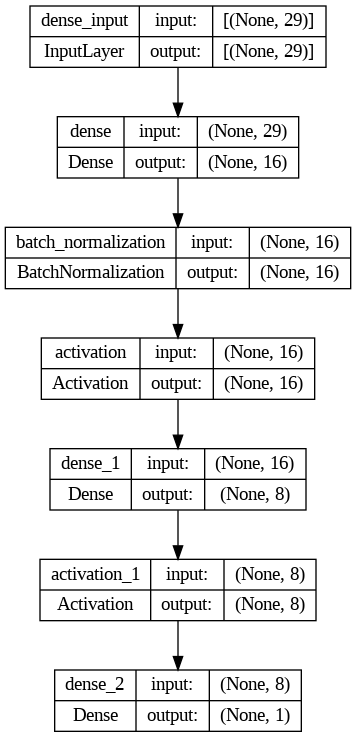

In [ ]:
#7. Plot layers
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

Berdasarkan plot layer tersebut, Sequential API terediri dari 4 layer, yaitu: input layer, hidden layer 1, hidden layer 2, dan output layer. Prosesnya dapat dinarasikan sebagai berikut.
1. input layer menerima input sebanyak 25 jenis dan menghasilkan 25 output dan 1 bias.

  Hasil dari input layer akan diteruskan ke hiden layer 1
2. hiden layer 1 terdiri dari (dense, batch_normalizaton, activation).

  Setelah hidden layer 1 menerima input dari input layer sebanyak 25 feature dan 1 bias. Data tersebut selanjutnya di normalisasi per-batch menggunakan 64 parameter (param:64) dan akan melalui 16 neuron aktivasi menggunakan algoritma elu hingga menghasilkan 16 jenis output dan 1 bias yang akan diteruskan ke layer hidden 2

3. hiden layer 2 terdiri dari (dense, batch_normalizaton, activation).

  Setelah hidden layer 2 menerima input dari hiden layer 1 sebanyak 16 feature dan 1 bias. Data tersebut selanjutnya di normalisasi per-batch menggunakan 136 parameter (param:136) dan akan melalui 8 neuron aktivasi menggunakan algoritma elu hingga menghasilkan 8 jenis output dan 1 bias yang akan diteruskan ke output.

3. hiden layer 2 terdiri dari (dense, batch_normalizaton, activation).

  Setelah output menerima input dari hiden layer 2 sebanyak 8 feature dan 1 bias. input tersebut kemudian akan melalui 1 neuron aktivator dengan algoritma sigmod dan menghasilkan 1 jenis output.

### 6-3 Model Functional API

Rules Model Sequential API:

- Hidden layer inisialisasi: 2
- Hiden layer 1: dense(16)
- hidden layer 2: dense(2)
- activation (elu) karena cepat konvergen
- optimizer (adam)
- menggunakan (batchnormalization)

In [ ]:
#0. Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Definisikan Functional API
input_layer = Input(shape=(29,))

#2.Hidden Layer 1
hidden_layer1 = Dense(32)(input_layer)
normalization_layer1 = BatchNormalization()(hidden_layer1)
activation_layer1 = Activation('elu')(normalization_layer1)

#3.Hidden Layer 2
hidden_layer2 = Dense(16)(activation_layer1)
normalization_layer2 = BatchNormalization()(hidden_layer2)
activation_layer2 = Activation('elu')(normalization_layer2)



#4.Concat Layer
concat_layer = concatenate([activation_layer2, input_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)
#5. output model_functional
model_functional = Model(inputs=input_layer, outputs=output_layer)

#6. Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])


#8. hasil summary
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           960         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32)           0           ['batch_normalization[0][0]']

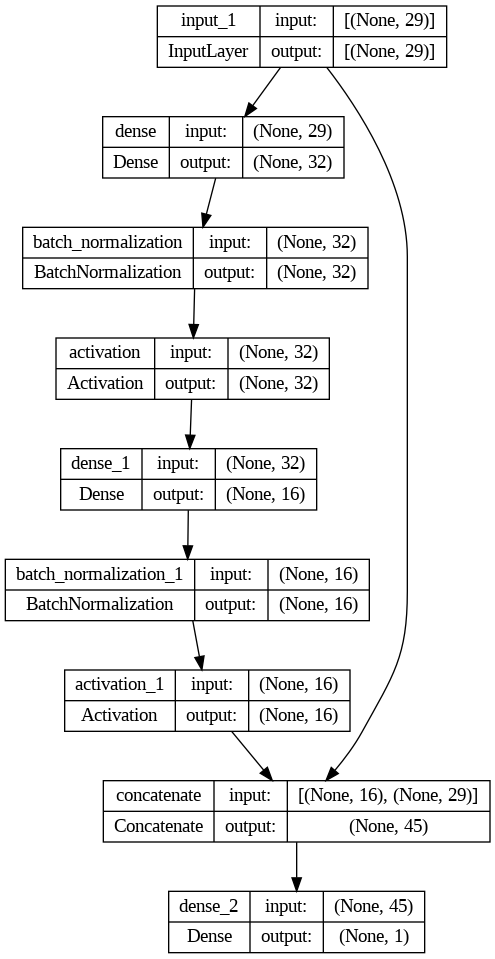

In [ ]:
#8. plot layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

Functional API terdiri dari 5 layer utama, yaitu: 1 input layer,2 hidden layer, 1 layer concat dan 1 ouput layer.

### 6-4 Model Improvement Sequential API

Berdasarkan hasil evalusi model baseline pada sequential API (8-2), model baseline ini memiliki explode gradient dan terdapat gap antara loss train dan loss validationnya. Oleh karena itu, perlu dilakukan improvement agar model dapat bekerja menjadi lebih baik.

Rules yang digunakan untuk model improvement sequential ini, sebagi berikut:
1. menambahkan drop out pada hidden selanjutnya (hidden ketiga) untuk mengurangi overfit. Dropout dimaksudkan untuk mengurangi jumlah neuron. Semakin sedikit jumlah neuron, semakin simple model yang diolah. ([ref: drop_out](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e))
2. lakukan aktivasi relu. Relu bekerja dengan membatasi threshold neuron, sehingga tidak akan ada nilai negatif karena akan diubah ke nilai nol. Sehingga kompleksitas neuron dapat lebih rendah. ([ref:relu](https://www.shiksha.com/online-courses/articles/relu-and-sigmoid-activation-function/))
3. Menambahkan 1 layer
4. mengganti fungsi optimasi menjadi nadam agar komputasi menjadi lebih cepat([ref: nadam](https://towardsdatascience.com/full-review-on-optimizing-neural-network-training-with-optimizer-9c1acc4dbe78))

In [ ]:
#0. Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1.Definisi Sequential API

model_sequential_improvement = Sequential()

#2.Hidden Layer 1
model_sequential_improvement.add(Dense(32, input_shape=(29,)))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


#3.Hidden Layer 2
model_sequential_improvement.add(Dense(16))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))

#4.Hidden Layer 3
model_sequential_improvement.add(Dense(8))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Dropout(rate=0.1))
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


#6.Output Layer
model_sequential_improvement.add(Dense(1, activation='sigmoid'))

#7.Compile
model_sequential_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])


#8.summary model
model_sequential_improvement.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

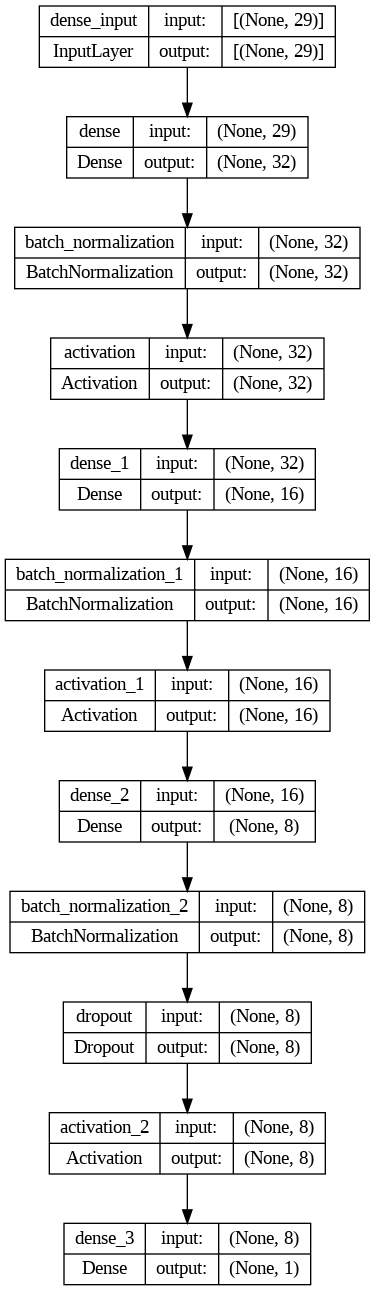

In [ ]:
#10.plot layer
tf.keras.utils.plot_model(model_sequential_improvement, show_shapes=True)

### 6-4 Model Improvement Functional API

Berdasarkan hasil evalusi model baseline pada functional API (8-3), model baseline ini memiliki explode gradient dan terdapat gap antara loss train dan loss validationnya. Oleh karena itu, perlu dilakukan improvement agar model dapat bekerja menjadi lebih baik.

Rules yang digunakan untuk model improvement sequential ini, sebagi berikut:
1. menambahkan drop out pada hidden selanjutnya (hidden ketiga) untuk mengurangi overfit. Dropout dimaksudkan untuk mengurangi jumlah neuron. Semakin sedikit jumlah neuron, semakin simple model yang diolah. (ref:[drop_out](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e))
2. lakukan aktivasi relu. Relu bekerja dengan membatasi threshold neuron, sehingga tidak akan ada nilai negatif karena akan diubah ke nilai nol. Sehingga kompleksitas neuron dapat lebih rendah. (ref:[relu](https://www.shiksha.com/online-courses/articles/relu-and-sigmoid-activation-function/))

3. Menambahkan 1 layer agar model menambah waktu belajar setelah dilakukan dropout (ref:[add_layer](https://stats.stackexchange.com/questions/232969/relation-between-learning-rate-and-number-of-hidden-layers))
4. mengganti fungsi optimasi menjadi nadam agar komputasi menjadi lebih cepat(ref:[nadam](https://towardsdatascience.com/full-review-on-optimizing-neural-network-training-with-optimizer-9c1acc4dbe78))

In [ ]:
#0.Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1.Definisi Functional API

imp_input_layer = Input(shape=(29,))

#2.Hidden Layer 1
imp_hidden_layer1 = Dense(128)(imp_input_layer)
imp_normalization_layer1 = BatchNormalization()(imp_hidden_layer1)
imp_dropout_layer1 = Dropout(rate=0.1)(imp_normalization_layer1)
imp_activation_layer1 = Activation('relu')(imp_dropout_layer1)

#3.Hidden Layer 2
imp_hidden_layer2 = Dense(64)(imp_activation_layer1)
imp_normalization_layer2 = BatchNormalization()(imp_hidden_layer2)
imp_activation_layer2 = Activation('relu')(imp_normalization_layer2)

#4.Hidden Layer 3
imp_hidden_layer3 = Dense(32)(imp_activation_layer2)
imp_normalization_layer3 = BatchNormalization()(imp_hidden_layer3)
imp_activation_layer3 = Activation('relu')(imp_normalization_layer3)

#5.Hidden Layer 4
imp_hidden_layer4 = Dense(16)(imp_activation_layer3)
imp_normalization_layer4 = BatchNormalization()(imp_hidden_layer4)
imp_activation_layer4 = Activation('relu')(imp_normalization_layer4)


#5.Hidden Layer 4
imp_hidden_layer4 = Dense(8)(imp_activation_layer3)
imp_normalization_layer4 = BatchNormalization()(imp_hidden_layer4)
imp_activation_layer4 = Activation('relu')(imp_normalization_layer4)


#6.Concat Layer
imp_concat_layer = concatenate([imp_activation_layer4, imp_input_layer])

#7.Output Layer
imp_output_layer = Dense(1, activation='sigmoid')(imp_concat_layer)

model_functional_improvement = Model(inputs=imp_input_layer, outputs=imp_output_layer)

#9.Compile
model_functional_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

#10. summary
model_functional_improvement.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          3840        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128)         512         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['batch_normalization[0][0]']

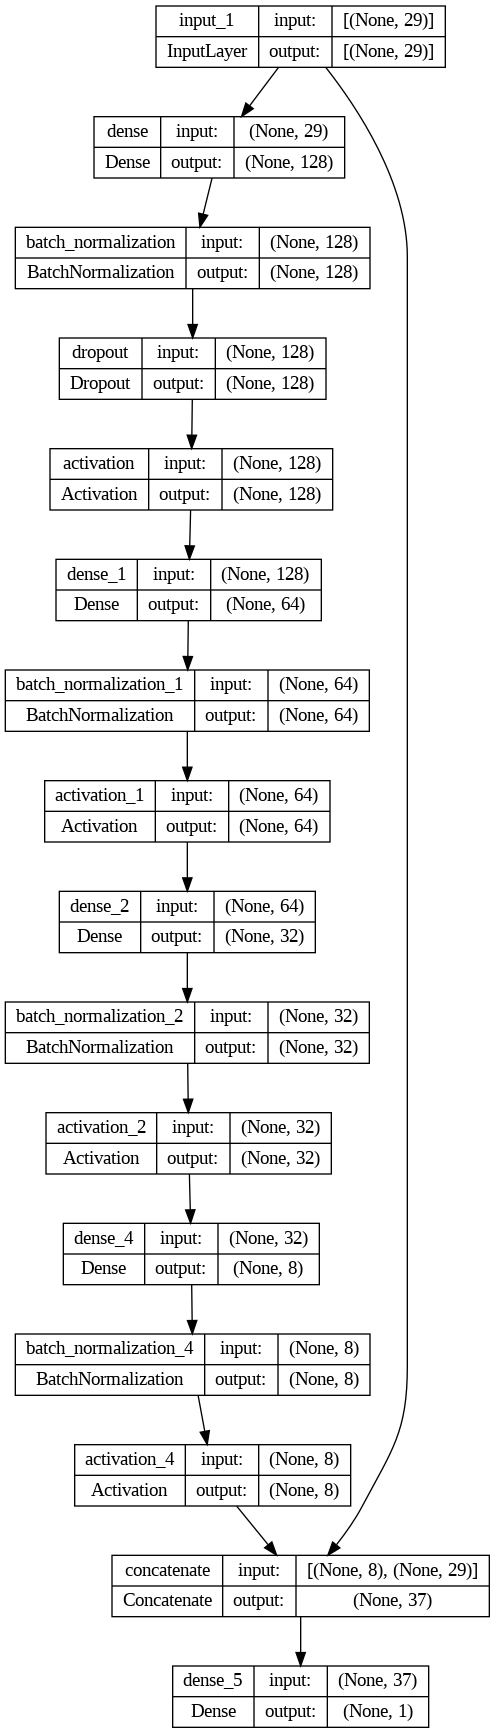

In [ ]:
#11. Plot Layers
tf.keras.utils.plot_model(model_functional_improvement, show_shapes=True)

## 7 - Model Training

### 7-1 Model Sequential API

In [ ]:
#0.Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Train the Model
history_seq = model_sequential.fit(train_pipe, epochs=50,validation_data=val_pipe)

Epoch 1/50
358/358 [==============================] - 9s 6ms/step - loss: 0.5548 - recall: 0.7260 - auc: 0.7933 - val_loss: 0.4743 - val_recall: 0.8024 - val_auc: 0.8633
Epoch 2/50
358/358 [==============================] - 2s 6ms/step - loss: 0.4584 - recall: 0.7729 - auc: 0.8670 - val_loss: 0.4550 - val_recall: 0.7719 - val_auc: 0.8693
Epoch 3/50
358/358 [==============================] - 2s 6ms/step - loss: 0.4543 - recall: 0.7855 - auc: 0.8689 - val_loss: 0.4544 - val_recall: 0.8024 - val_auc: 0.8694
Epoch 4/50
358/358 [==============================] - 3s 7ms/step - loss: 0.4483 - recall: 0.7904 - auc: 0.8724 - val_loss: 0.4546 - val_recall: 0.8045 - val_auc: 0.8685
Epoch 5/50
358/358 [==============================] - 2s 6ms/step - loss: 0.4436 - recall: 0.7937 - auc: 0.8752 - val_loss: 0.4521 - val_recall: 0.7923 - val_auc: 0.8696
Epoch 6/50
358/358 [==============================] - 2s 5ms/step - loss: 0.4407 - recall: 0.8022 - auc: 0.8768 - val_loss: 0.4497 - val_recall: 0.778

Training berhenti pada epoch ke 17 karena val loss tidak mengalami penurunan lagi.

### 7-2 Model Functional API

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#Train the Model

history_func = model_functional.fit(train_pipe, epochs=50,validation_data=val_pipe)

Epoch 1/50
358/358 [==============================] - 5s 7ms/step - loss: 0.5222 - recall: 0.7654 - auc: 0.8198 - val_loss: 0.4736 - val_recall: 0.8228 - val_auc: 0.8629
Epoch 2/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4586 - recall: 0.7817 - auc: 0.8659 - val_loss: 0.4637 - val_recall: 0.7943 - val_auc: 0.8633
Epoch 3/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4527 - recall: 0.7853 - auc: 0.8695 - val_loss: 0.4600 - val_recall: 0.7821 - val_auc: 0.8653
Epoch 4/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4435 - recall: 0.7980 - auc: 0.8753 - val_loss: 0.4534 - val_recall: 0.7495 - val_auc: 0.8707
Epoch 5/50
358/358 [==============================] - 3s 9ms/step - loss: 0.4426 - recall: 0.8035 - auc: 0.8757 - val_loss: 0.4520 - val_recall: 0.7556 - val_auc: 0.8710
Epoch 6/50
358/358 [==============================] - 4s 12ms/step - loss: 0.4370 - recall: 0.8045 - auc: 0.8791 - val_loss: 0.4514 - val_recall: 0.75

Training berhenti pada epoch ke 12 karena val loss tidak mengalami penurunan lagi.

### 7-3 Model Improvement Sequential API

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Train the Model

history_seq_improvement = model_sequential_improvement.fit(train_pipe, epochs=50,validation_data=val_pipe)

Epoch 1/50
358/358 [==============================] - 10s 9ms/step - loss: 0.5836 - recall: 0.7506 - auc: 0.7613 - val_loss: 0.5063 - val_recall: 0.7841 - val_auc: 0.8361
Epoch 2/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4804 - recall: 0.7550 - auc: 0.8524 - val_loss: 0.4738 - val_recall: 0.7800 - val_auc: 0.8574
Epoch 3/50
358/358 [==============================] - 3s 9ms/step - loss: 0.4643 - recall: 0.7740 - auc: 0.8629 - val_loss: 0.4620 - val_recall: 0.8024 - val_auc: 0.8651
Epoch 4/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4495 - recall: 0.7944 - auc: 0.8717 - val_loss: 0.4649 - val_recall: 0.7882 - val_auc: 0.8632
Epoch 5/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4450 - recall: 0.7984 - auc: 0.8740 - val_loss: 0.4645 - val_recall: 0.8187 - val_auc: 0.8649
Epoch 6/50
358/358 [==============================] - 3s 8ms/step - loss: 0.4370 - recall: 0.8125 - auc: 0.8788 - val_loss: 0.4656 - val_recall: 0.79

Training berhenti pada epoch ke 5 karena val loss tidak mengalami penurunan lagi

### 7-4 Model Improvement Functional API

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Train the Model

history_func_improvement = model_functional_improvement.fit(train_pipe, epochs=50,validation_data=val_pipe)

Epoch 1/50
358/358 [==============================] - 12s 13ms/step - loss: 0.5424 - recall: 0.6369 - auc: 0.8078 - val_loss: 0.4709 - val_recall: 0.7780 - val_auc: 0.8606
Epoch 2/50
358/358 [==============================] - 3s 9ms/step - loss: 0.4495 - recall: 0.8024 - auc: 0.8717 - val_loss: 0.4485 - val_recall: 0.7923 - val_auc: 0.8716
Epoch 3/50
358/358 [==============================] - 3s 9ms/step - loss: 0.4362 - recall: 0.8204 - auc: 0.8794 - val_loss: 0.4585 - val_recall: 0.7862 - val_auc: 0.8661
Epoch 4/50
358/358 [==============================] - 3s 10ms/step - loss: 0.4275 - recall: 0.8197 - auc: 0.8844 - val_loss: 0.4539 - val_recall: 0.8310 - val_auc: 0.8711
Epoch 5/50
358/358 [==============================] - 4s 11ms/step - loss: 0.4152 - recall: 0.8242 - auc: 0.8911 - val_loss: 0.4623 - val_recall: 0.7821 - val_auc: 0.8654
Epoch 6/50
358/358 [==============================] - 4s 10ms/step - loss: 0.4068 - recall: 0.8314 - auc: 0.8958 - val_loss: 0.4569 - val_recall: 

Training berhenti pada epoch ke 8 karena val loss tidak mengalami penurunan lagi.

## 8- Model Evaluation

### 8-1 Model Sequential API

Sebelum melakukan evaluasi, ubah data hisory model sequencial menjadi dataframe agar memudahkan pembacaan.

In [ ]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
#tampilkan 5 history terbawah
history_seq_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
45,0.399225,0.830659,0.899656,0.431573,0.839104,0.882935
46,0.404751,0.831531,0.896909,0.431217,0.828921,0.882949
47,0.401141,0.832054,0.898769,0.434397,0.832994,0.881265
48,0.397313,0.835717,0.900913,0.433949,0.830957,0.881536
49,0.398009,0.830485,0.900635,0.430760,0.830957,0.883651


(0.0, 1.0)

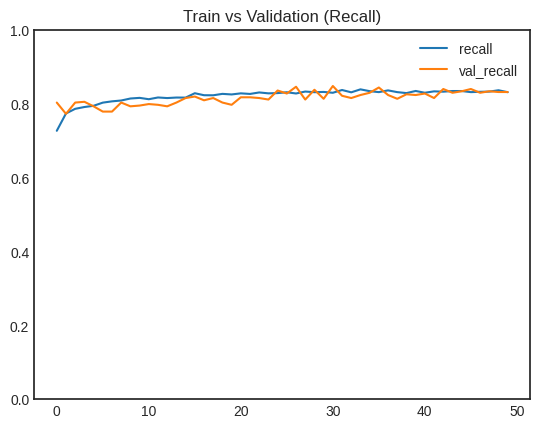

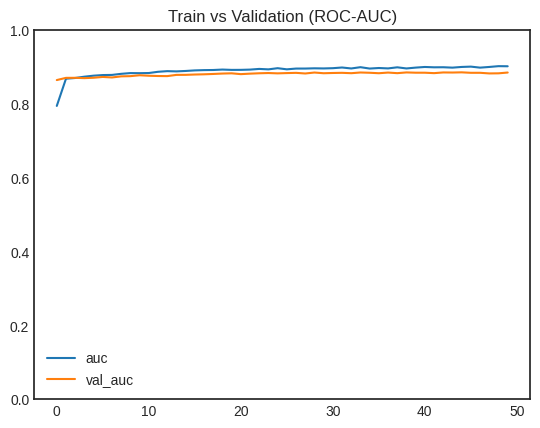

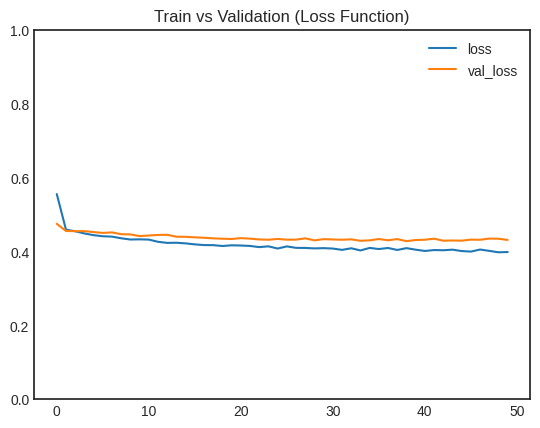

In [ ]:
# Plot Traning Results
history_seq_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Observasi:

- Berdasarkan data 5 hasil terakhir, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.91 dan 0.93)
- sementara jika dilihat dari plot, terjadi explode gradient (nilai naik turun) pada train set. Oleh karena itu, perlu dilakukan regularisasi/dropout.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.22 dan 0.20). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
# Model Evaluation of test-set
y_pred_seq_train = model_sequential.predict(X_train_final)
y_pred_seq_train = np.where(y_pred_seq_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq_train))

179/179 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2856
           1       0.83      0.85      0.84      2867

    accuracy                           0.84      5723
   macro avg       0.84      0.84      0.84      5723
weighted avg       0.84      0.84      0.84      5723



In [ ]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       586
           1       0.82      0.83      0.82       603

    accuracy                           0.82      1189
   macro avg       0.82      0.82      0.82      1189
weighted avg       0.82      0.82      0.82      1189



In [ ]:
#Perhitungan ROC-AUC Test

auc_seq = roc_auc_score(y_test, y_pred_seq)
auc_seq

0.8198597456403988

***Observasi:***

Setelah dilakukan pengetesan, didapatkan bahwa:
- nilai recall hasil test tidak secara signifikan berbeda dengan recall test.
  - recall train: 0.92
  - recall test: 0.88

  Karena tidak berbeda secara signifikan, model ini cukup baik dalam memprediksi churn dan not churn, namun masuk kedalam kategori overfitting.

- AUC test benilai 0.89, hal ini berarti model tidak dipengaruhi oleh threshold. Model dapat mengklasifikasikan negatif dan positif churn dengan baik.

In [ ]:
#variabel Act vs Pred
act_pred_seq = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq)
})
df_act_pred_seq = pd.concat([X_test, act_pred_seq],axis=1)

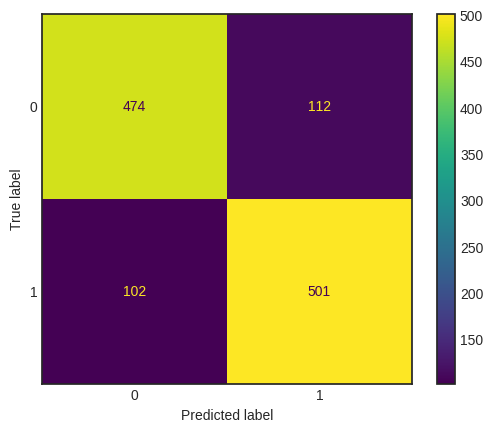

In [ ]:
# Confusion Matrix
cm_test_seq = confusion_matrix(y_test, y_pred_seq)
ConfusionMatrixDisplay(cm_test_seq).plot()

***Observasi:***

- Berdasarkan conffusion matrix, model lebih cenderung memprediksi `churn` dengan customer yang terdeteksi tidak churn padahal churn sebanyak 341 customer (0.061%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 222 (0.40%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10%

### 8-2 Model Functional API

In [ ]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
history_func_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
45,0.380139,0.839902,0.909836,0.446756,0.814664,0.876252
46,0.382515,0.847750,0.908504,0.433710,0.810591,0.884232
47,0.380810,0.845134,0.909383,0.434072,0.826884,0.882906
48,0.380910,0.844611,0.909449,0.431773,0.814664,0.885190
49,0.378676,0.844437,0.910259,0.431281,0.816701,0.884990


(0.0, 1.0)

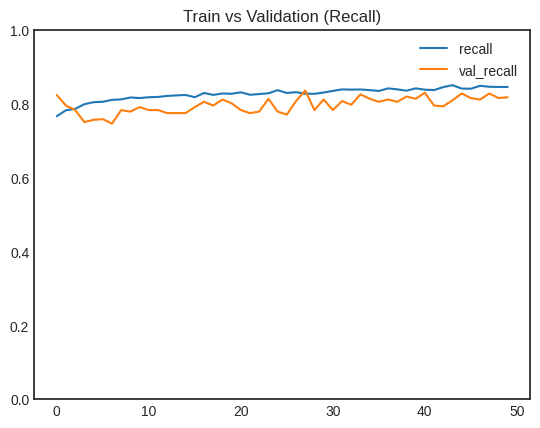

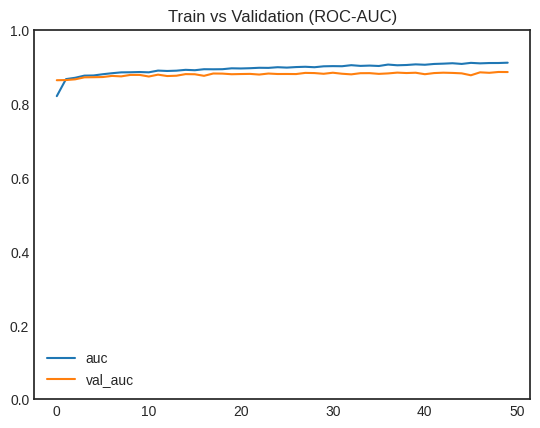

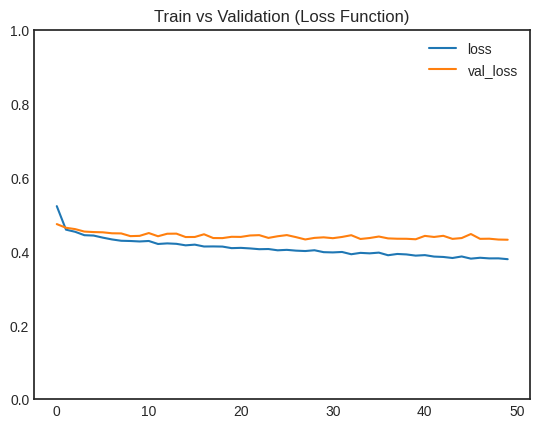

In [ ]:
# Plot Traning Results

history_func_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.95)
- sementara sama halnya dengan model sequential, berdasarkan plotnya garis train dan validationnya mengalami explode gradient (nilai naik turun). Oleh karena itu, perlu dilakukan regularisasi/dropout.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.21 dan 0.19). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >=0.01, 1, 0)

print(classification_report(y_test, y_pred_func))

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.08      0.15       586
           1       0.53      1.00      0.69       603

    accuracy                           0.55      1189
   macro avg       0.75      0.54      0.42      1189
weighted avg       0.75      0.55      0.42      1189



In [ ]:
#Perhitungan ROC-AUC Test

auc_func = roc_auc_score(y_test, y_pred_func)
auc_func

0.5401264440029658

***Observasi:***

Setelah dilakukan pengetesan, didapatkan bahwa:
- nilai recall hasil test tidak secara signifikan berbeda dengan recall test.
  - recall train: 0.93
  - recall test: 0.95

  Karena tidak berbeda secara signifikan, model ini adalah goodfit.

- AUC test benilai 0.76, hal ini berarti model dipengaruhi oleh threshold
- tingkat akurasi yang dimiliki model ini cukup baik yaitu sebesar 80%

In [ ]:
#Act vs Pred
act_pred_func = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func)
})
df_act_pred_func = pd.concat([X_test, act_pred_func],axis=1)

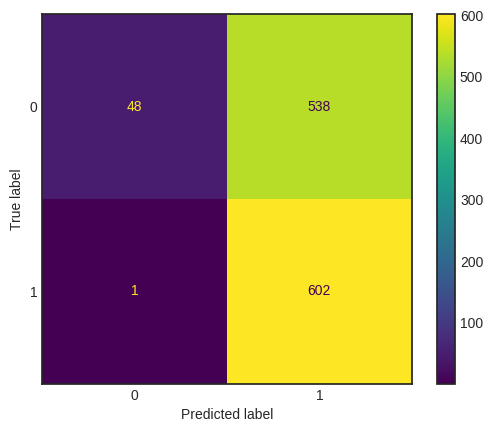

In [ ]:
# Confusion Matrix
cm_test_func = confusion_matrix(y_test, y_pred_func)
ConfusionMatrixDisplay(cm_test_func).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `tidak churn`. Customer yang terdeteksi tidak churn padahal churn sebanyak 1079 customer (0.19%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 156 (0.28%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 22%

### 8-3 Model Improvement Sequential API

In [ ]:
# Create DataFrame

history_seq_improvement_df = pd.DataFrame(history_seq_improvement.history)
history_seq_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
45,0.364876,0.849843,0.917495,0.480201,0.814664,0.868394
46,0.365417,0.845657,0.916565,0.479730,0.794297,0.867866
47,0.364596,0.851936,0.916908,0.491505,0.820774,0.865115
48,0.361260,0.849843,0.919117,0.481306,0.800407,0.867960
49,0.362296,0.854552,0.918784,0.486655,0.816701,0.865820


(0.0, 1.0)

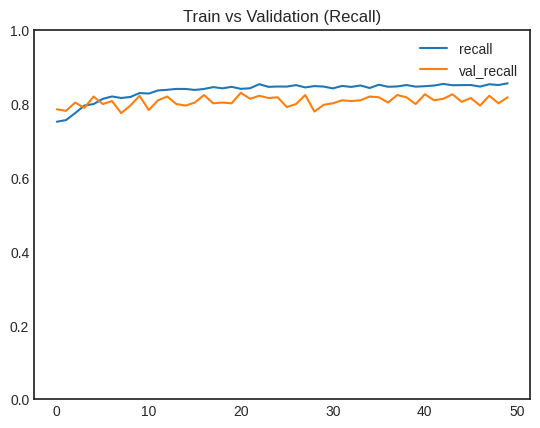

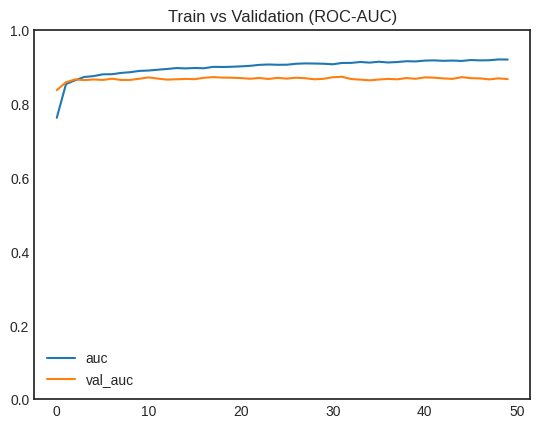

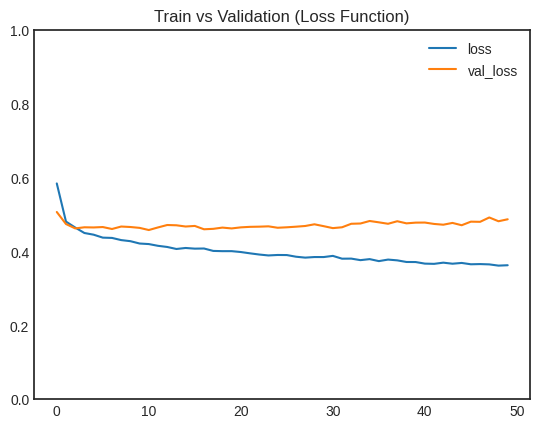

In [ ]:
# Plot Traning Results

history_seq_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.95)
- Berdasarkan plotnya, setelah dilakukan improvement recall pada train dan validation terlihat lebih stabil dibandingkan model baseline.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. Hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set menjadi lebih rendah yang bernilai (0.18 dan 0.17). Berdasarkan plotnya, garis loss antara train dan validation semakin lama semakin mendekat antara satu sama lain. Hal ini berarti, model dapat mengklasifikasikan churn dengan lebih baik

In [ ]:
# Model Evaluation of test-set

y_pred_seq_improvement_train = model_sequential_improvement.predict(X_train_final)
y_pred_seq_improvement_train = np.where(y_pred_seq_improvement_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq_improvement_train))

179/179 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2856
           1       0.86      0.89      0.87      2867

    accuracy                           0.87      5723
   macro avg       0.87      0.87      0.87      5723
weighted avg       0.87      0.87      0.87      5723



In [ ]:
# Model Evaluation of test-set

y_pred_seq_improvement = model_sequential_improvement.predict(X_test_final)
y_pred_seq_improvement = np.where(y_pred_seq_improvement >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_improvement))

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       586
           1       0.82      0.83      0.83       603

    accuracy                           0.82      1189
   macro avg       0.82      0.82      0.82      1189
weighted avg       0.82      0.82      0.82      1189



In [ ]:
#Perhitungan ROC-AUC Test

auc_seq_imp = roc_auc_score(y_test, y_pred_seq_improvement)
auc_seq_imp

0.8215902852065045

In [ ]:
# Act vs Pred
act_pred_seq_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq_improvement)
})
df_act_pred_seq_imp = pd.concat([X_test, act_pred_seq_imp],axis=1)

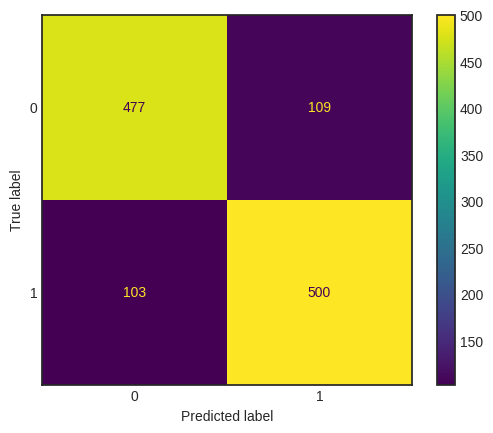

In [ ]:
# Confusion Matrix
cm_test_seq_imp = confusion_matrix(y_test, y_pred_seq_improvement)
ConfusionMatrixDisplay(cm_test_seq_imp).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `churn`.Customer yang terdeteksi tidak churn padahal churn sebanyak 291 customer (0.045%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 255 (0.053%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10%
- Nilai AUC pada model ini adalah sebesar 0.89 sehingga dapat disimpulkan bahwa model tidak dipengaruhi oleh threshold. Semakin besar nilai AUC semakin baik model ini memprediksi false negatif dan false positiv

### 8-4 Model Improvement Functional API

In [ ]:
#buat dataframe
history_func_improvement_df = pd.DataFrame(history_func_improvement.history)
history_func_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
45,0.281504,0.883502,0.951362,0.544780,0.794297,0.865700
46,0.283769,0.881235,0.950419,0.552045,0.806517,0.867209
47,0.284281,0.883153,0.950549,0.551998,0.806517,0.865098
48,0.279570,0.883328,0.952006,0.548732,0.780041,0.865153
49,0.281665,0.884897,0.951394,0.542253,0.796334,0.867425


(0.0, 1.0)

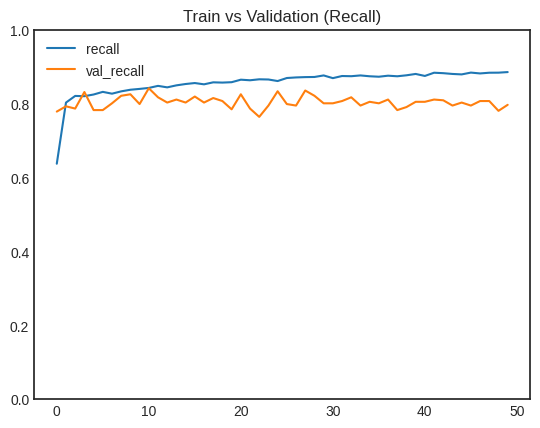

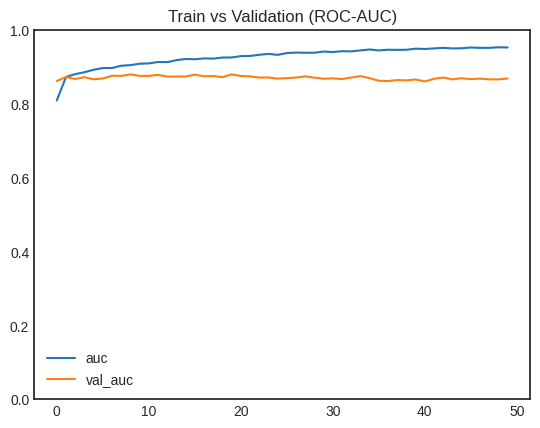

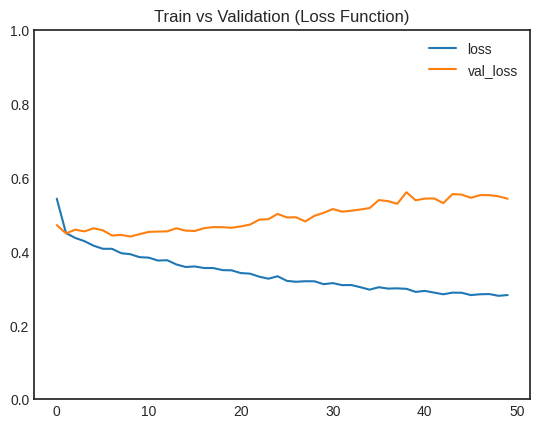

In [ ]:
# Plot Traning Results

history_func_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

In [ ]:
# Evaluate Test-Set
y_pred_func_improvement = model_functional_improvement.predict(X_test_final)
y_pred_func_improvement = np.where(y_pred_func_improvement >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_improvement))

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       586
           1       0.79      0.80      0.80       603

    accuracy                           0.79      1189
   macro avg       0.79      0.79      0.79      1189
weighted avg       0.79      0.79      0.79      1189



***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.94). Sementara itu, berdasarkan plotnya, garisnya sudah lebih stabil
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC.
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.18 dan 0.17). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
#Perhitungan ROC-AUC Test

auc_func_imp = roc_auc_score(y_test, y_pred_func_improvement)
auc_func_imp

0.792111682769316

In [ ]:
#Act vs Pred
act_pred_func_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func_improvement)
})
df_act_pred_func_imp = pd.concat([X_test, act_pred_func_imp],axis=1)

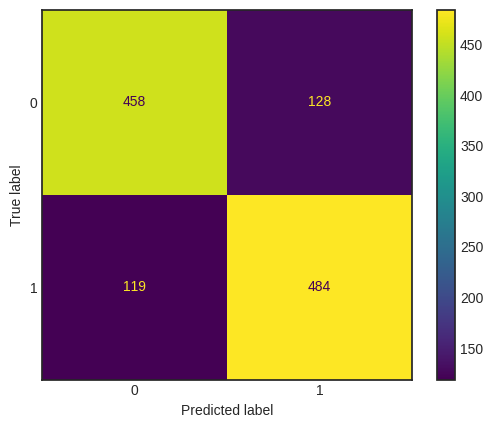

In [ ]:
# Confusion Matrix
cm_test_func_imp = confusion_matrix(y_test, y_pred_func_improvement)
ConfusionMatrixDisplay(cm_test_func_imp).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `churn`.Customer yang terdeteksi tidak churn padahal churn sebanyak 345 customer (0.043%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 212 (0.059%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10.29%

### 8-5 Model Sequential API vs Model Improvement Sequential API

In [ ]:
# Hasil Training

seq_training_df = pd.concat([pd.DataFrame(history_seq_df.iloc[-1]).rename(columns={16:'sequential'}),pd.DataFrame(history_seq_improvement_df.iloc[-1]).rename(columns={7 :'sequential_improvement'})],axis=1).T
seq_training_df

,loss,recall,auc,val_loss,val_recall,val_auc
49,0.398009,0.830485,0.900635,0.430760,0.830957,0.883651
49,0.362296,0.854552,0.918784,0.486655,0.816701,0.865820


In [ ]:
#Pembuatan list kolom performansi semua model
seq_accu = [accuracy_score(y_test, y_pred_seq),accuracy_score(y_test, y_pred_seq_improvement)]
seq_recall = [recall_score(y_test, y_pred_seq),recall_score(y_test, y_pred_seq_improvement)]
seq_f1 = [f1_score(y_test, y_pred_seq),f1_score(y_test, y_pred_seq_improvement)]
seq_auc =[auc_seq, auc_seq_imp]

In [ ]:
#Membuat dataframe performansi
df_seq_eval = pd.DataFrame([seq_accu, seq_f1, seq_recall, seq_auc], index=['Accuracy','F1','Recall','AUC'], columns=['sequential', 'sequential_improvement']).T

In [ ]:
# Hasil Test-Set
df_seq_eval = df_seq_eval
df_seq_eval

,Accuracy,F1,Recall,AUC
sequential,0.820017,0.824013,0.830846,0.81986
sequential_improvement,0.821699,0.825083,0.829187,0.82159


***Observasi:***


- nilai recall  meningkat masing-masing mengalami peningkatan hingga 0.01
- nilai AUC training-validation terjadi peningkatan hingga 0.1
- hasil test model improvement mengalami peningkatan dan model menjadi lebih baik untuk tingkat accuracy, F1, Recall hingga AUC

Hal ini berarti, model improvement berhasil melakukan peningkatan dan memiliki peformansi lebih baik daripada baseline.

### 8-6 Model Functional API vs Model Improvement Functional API

In [ ]:
# Hasil Training

func_training_df = pd.concat([pd.DataFrame(history_func_df.iloc[-1]).rename(columns={13 :'functional'}),pd.DataFrame(history_func_improvement_df.iloc[-1]).rename(columns={4 :'functional_improvement'})],axis=1).T
func_training_df

,loss,recall,auc,val_loss,val_recall,val_auc
49,0.378676,0.844437,0.910259,0.431281,0.816701,0.884990
49,0.281665,0.884897,0.951394,0.542253,0.796334,0.867425


In [ ]:
#Pembuatan list kolom performansi semua model
func_accu = [accuracy_score(y_test, y_pred_func),accuracy_score(y_test, y_pred_func_improvement)]
func_recall = [recall_score(y_test, y_pred_func),recall_score(y_test, y_pred_func_improvement)]
func_f1 = [f1_score(y_test, y_pred_func),f1_score(y_test, y_pred_func_improvement)]
func_auc =[auc_func, auc_func_imp]

In [ ]:
#Membuat dataframe performansi
df_func_eval = pd.DataFrame([func_accu, func_f1, func_recall, func_auc], index=['Accuracy','F1','Recall','AUC'], columns=['functional', 'functional_improvement']).T

In [ ]:
# Hasil Test-Set
df_func_eval = df_func_eval
df_func_eval

,Accuracy,F1,Recall,AUC
functional,0.546678,0.690763,0.998342,0.540126
functional_improvement,0.792262,0.796708,0.802653,0.792112


***Observasi:***

Berdasarkan informasi diatas, hasil model improvement didapatkan bahwa:
- nilai recall meningkat hingga 0.20, namun pada validation terjadi penurunan
- nilai AUC training-validation terjadi peningkatan hingga 0.1
- hasil test model improvement mengalami peningkatan dan model menjadi lebih baik untuk tingkat accuracy, F1, dan AUC, namun tidak pada nilai recall yang turun hingga 0.19

Hal ini berarti, model improvement berhasil melakukan peningkatan dan memiliki peformansi yang lebih baik daripada baseline, namun dalam menentukan subscribe model basement memiliki tingkat recall lebih tinggi.

### 8-7 Model Selection

Berdasarkan analisis yang telah dilakukan, model terbaik pada Nueral Network adalah ***model_sequential_improvement***.

## 9-Model Saving

Selanjutnya dilakukan penyimpanan model terbaik dan dilakukan freeze pada model tersebut agar tidak dapat diubah-ubah lagi datanya.

In [ ]:
# Summary of Model Sequential

best_model_NN=model_sequential_improvement
best_model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

In [ ]:
# Freeze Model
best_model_NN.trainable = False
best_model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

In [ ]:
# Model Saving
with open('preprocessor_nn.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

model_sequential_improvement.save('nn_best_model.h5')

- Simpan Data Test

In [ ]:
#reset index data
test=X_test.reset_index(drop=True)

In [ ]:
#simpan data post undersampling
test.to_csv('X_test.csv',index_label=False)

# 10-Model Utama

Model utama serta kesimpulan [Notebook Utama](https://github.com/destiratnakomala/Final-Project-FTDS-020/blob/main/Bank-Marketing-Term-Deposit/Main_desti_ratna_komala.ipynb)